In [1]:
%matplotlib inline
import matplotlib as mpl
import nuSQUIDSpy as nsq
import matplotlib.pyplot as plt

import nuSQUIDSTools
import numpy as np
import time as t

In [2]:
units = nsq.Const()

In [3]:
cth_neg_dense=np.append(np.linspace(-1,-0.8,20),np.linspace(-0.8,-0.76,15)[1:])
cth_neg=np.append(cth_neg_dense,np.linspace(-0.76,0.0,16)[1:])
cth_pos=np.linspace(0.0,1.0,5)[1:]
cos_range_opt=np.append(cth_neg,cth_pos)

In [4]:
inistate = 0 #e-nu=0, mu-nu=1, tau-nu=2 #both nu and anti nu equally

neutrino_flavors = 4 #3 for standard, 4 for sterile

#mixing angles in rad
th14 = 0.0 
th24 = 0.0
th34 = 0.0

#mass diffs in eV
masssqdiffsterile = 1.0

#power law params
Numnus = 1.0e18 #number of neutrinos
Power = -2.0 #scaling, 0 for equal distribution
Eflux = lambda E: Numnus*E**Power

In [5]:
%run OscStuff.ipynb

In [6]:
energy_nodes=NewNodes(2)
Fluxmodel = np.interp(NewNodes(2),energy_nodes,Eflux(energy_nodes))

In [7]:
Theta24_range = np.linspace(5,45,9)/180*np.pi
energy_nodes=NewNodes(2)
cth_nodes = cos_range_opt
interactions = False
neutrino_flavors = 4 #sterile
trackangle = -1.0

In [8]:
fluxdiff_24_plotflag = True

if fluxdiff_24_plotflag == True:

    for th in Theta24_range[4:5]:

        #evolve section

        nsq_atm3_single =nuSQUIDSTools.ExtNuSQUIDSAtm(cth_nodes,energy_nodes,3,nsq.NeutrinoType.both,interactions) #SM case
        nsq_atm4_single =nuSQUIDSTools.ExtNuSQUIDSAtm(cth_nodes,energy_nodes,4,nsq.NeutrinoType.both,interactions) #sterile case

        nsq_atm3_single.Set_MixingParametersToDefault()
        nsq_atm4_single.Set_MixingParametersToDefault()
        MixParams=ChangeMixingParams(nsq_atm4_single) #change mixing for sterile
        MixParams.Mass(3,1.) # sets delta m34^2=1ev^2
        MixParams.Angle(1,3,th) #sets mixing angle 24 to th value in range

        IFlux3=SetIniFlux(nsq_atm3_single,1,"both",Numnus,Power) #equal muon initial flux for both
        IFlux4=SetIniFlux(nsq_atm4_single,1,"both",Numnus,Power) 
        nsq_atm3_single.Set_initial_state(IFlux3,nsq.Basis.flavor)
        nsq_atm4_single.Set_initial_state(IFlux4,nsq.Basis.flavor)

        temp=t.time()
        nsq_atm3_single.Set_rel_error(1.0e-5) #evolves SM
        nsq_atm3_single.Set_abs_error(1.0e-5)
        nsq_atm3_single.EvolveState()
        print(t.time()-temp,"s") 
        temp=t.time()
        nsq_atm4_single.Set_rel_error(1.0e-5) #evolves sterile
        nsq_atm4_single.Set_abs_error(1.0e-5)
        nsq_atm4_single.EvolveState()
        print(t.time()-temp,"s") 

        mlabel = r"$\Delta m^{{2}}_{{14}}=1$ eV$^2$" #sterile mass label
        thlabel = r"$\Theta_{{24}}={test}$".format(test=round(th,3)) #extra label with specific 24 angle for plot legend
        exlabel=mlabel+'\n '+thlabel

        Plots_single_0_0 = nuPlots(nsq_atm3_single) #SM fluxes
        Flux_single_0_0_mu = Plots_single_0_0.Get_Flux(trackangle,0)
        Plots_single_0_1 = nuPlots(nsq_atm3_single)
        Flux_single_0_1_mu = Plots_single_0_1.Get_Flux(trackangle,1)

        Plots_single_1_0 = nuPlots(nsq_atm4_single) #sterile fluxes
        Flux_single_1_0_mu = Plots_single_1_0.Get_Flux(trackangle,0)  
        Plots_single_1_1 = nuPlots(nsq_atm4_single)
        Flux_single_1_1_mu = Plots_single_1_1.Get_Flux(trackangle,1)   

        #plotsection
        
        phi_single_0_0_e, phi_single_0_0_mu, phi_single_0_0_tau, total_single_0_0 = Flux_single_0_0_mu #SM neu, anti
        phi_single_0_1_e, phi_single_0_1_mu, phi_single_0_1_tau, total_single_0_1 = Flux_single_0_1_mu
        phi_single_1_0_e, phi_single_1_0_mu, phi_single_1_0_tau, phi_single_1_0_s, total_single_1_0 = Flux_single_1_0_mu #sterile neu, anti
        phi_single_1_1_e, phi_single_1_1_mu, phi_single_1_1_tau, phi_single_1_1_s, total_single_1_1 = Flux_single_1_1_mu

        del_single_mu_0 = phi_single_0_0_mu - phi_single_1_0_mu #numu flux differential SM - sterile
        del_single_mu_1 = phi_single_0_1_mu - phi_single_1_1_mu
        
        '''
        Elabel, tr_probs, fluxlabel = Labels(nsq_atmTh,1,1,Numnus,Power)
        fluxlabel = Labels(nsq_atmTh,1,"both",Numnus,Power)[2]
        tracklabel=r"$\Theta={tr}\pi$".format(tr=round(np.arccos(trackangle)/np.pi,2))

        thlab="{}".format(round(th,3))
        temp=thlab.partition('.') #separates into multiple strings on dots
        thlab=temp[0]+temp[2] #joins string together without dots

        fig0, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [2, 0.8]},figsize=(7,7))
        #ax1=plt.subplot(211)
        ax1.plot(energy_nodes/units.GeV,phi_0_0_mu/Fluxmodel, lw = 1., ls='solid', color = "red",label=r"3-$\nu$ model")
        ax1.plot(energy_nodes/units.GeV,phi_1_0_mu/Fluxmodel, lw = 1., ls='solid', color = "blue",label=r"3+1-$\nu$ model") 
        ax1.plot(energy_nodes/units.GeV,total_0_0/Fluxmodel, lw = 2., color = "black",label=r"Total")
        ax1.plot([],'',label=exlabel,color='white')
        ax1.set_xscale('log')
        ax1.set_xlim(energy_nodes[0]/units.GeV,energy_nodes[-1]/units.GeV)
        ax1.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
        ax1.set_ylim(0,1.01)
        ax1.set_ylabel(r"$P[\nu_{{\mu}} \to \nu_{{\mu}}]$",fontsize = 14)
        ax1.grid()
        ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize = 14, fancybox =True)
        ax1.set_title(r"Atmosph. $\nu_\mu$-osc."+', '+tracklabel+' ,'+Elabel+' ,'+fluxlabel)
        #ax2=plt.subplot(212)
        ax2.plot(energy_nodes/units.GeV,del_mu_0/Fluxmodel, lw = 1., ls='solid', color = "purple")
        ax2.plot(energy_nodes/units.GeV,np.zeros(len(del_mu_0)), lw = 1., ls='solid', color = "black") 
        ax2.set_xscale('log')
        ax2.set_xlim(energy_nodes[0]/units.GeV,energy_nodes[-1]/units.GeV)
        ax2.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
        ax2.set_ylabel(r"$ P_{3\nu} - P_{(3+1)\nu}$",fontsize = 14)
        ax2.set_xlabel(r"E [GeV]",fontsize = 14)
        #plt.savefig("Osc_Param_Test_Plots/SMtoSterileDiff/fluxdiff"+thlab+"_th24_neu_mu.png", bbox_inches='tight')

        fig1, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [2, 0.8]},figsize=(7,7))
        #ax1=plt.subplot(211)
        ax1.plot(energy_nodes/units.GeV,phi_0_1_mu/Fluxmodel, lw = 1., ls='solid', color = "red",label=r"3-$\nu$ model")
        ax1.plot(energy_nodes/units.GeV,phi_1_1_mu/Fluxmodel, lw = 1., ls='solid', color = "blue",label=r"3+1-$\nu$ model") 
        ax1.plot(energy_nodes/units.GeV,total_1_1/Fluxmodel, lw = 2., color = "black",label=r"Total")
        ax1.plot([],'',label=exlabel,color='white')
        ax1.set_xscale('log')
        ax1.set_xlim(energy_nodes[0]/units.GeV,energy_nodes[-1]/units.GeV)
        ax1.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
        ax1.set_ylim(0,1.01)
        ax1.set_ylabel(r"$P[\bar{\nu}_{{\mu}} \to \bar{\nu}_{{\mu}}]$",fontsize = 14)
        ax1.grid()
        ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize = 14, fancybox =True)
        ax1.set_title(r"Atmosph. $\bar{\nu}_\mu$-osc."+', '+tracklabel+' ,'+Elabel+' ,'+fluxlabel)
        #ax2=plt.subplot(212)
        ax2.plot(energy_nodes/units.GeV,del_mu_1/Fluxmodel, lw = 1., ls='solid', color = "purple")
        ax2.plot(energy_nodes/units.GeV,np.zeros(len(del_mu_0)), lw = 1., ls='solid', color = "black") 
        ax2.set_xscale('log')
        ax2.set_xlim(energy_nodes[0]/units.GeV,energy_nodes[-1]/units.GeV)
        ax2.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
        ax2.set_ylabel(r"$ P_{3\nu} - P_{(3+1)\nu}$",fontsize = 14)
        ax2.set_xlabel(r"E [GeV]",fontsize = 14)
        #plt.savefig("Osc_Param_Test_Plots/SMtoSterileDiff/fluxdiff"+thlab+"_th24_antineu_mu.png", bbox_inches='tight')
        plt.close()
        '''

1.6183173656463623 s
140.50380325317383 s


In [9]:
energy_nodes=NewNodes(2)
nodes_2=energy_nodes
cth_nodes = cos_range_opt
interactions = False
neutrino_flavors = 4 #sterile
trackangle = -1.0

fluxdiff_24_plotflag = True

if fluxdiff_24_plotflag == True:

    for th in Theta24_range[4:5]:

        #evolve section

        nsq_atm3_multi =nuSQUIDSTools.ExtNuSQUIDSAtm(cth_nodes,energy_nodes,3,nsq.NeutrinoType.both,interactions) #SM case
        nsq_atm4_multi =nuSQUIDSTools.ExtNuSQUIDSAtm(cth_nodes,energy_nodes,4,nsq.NeutrinoType.both,interactions) #sterile case

        nsq_atm3_multi.Set_MixingParametersToDefault()
        nsq_atm4_multi.Set_MixingParametersToDefault()
        MixParams=ChangeMixingParams(nsq_atm4_multi) #change mixing for sterile
        MixParams.Mass(3,1.) # sets delta m34^2=1ev^2
        MixParams.Angle(1,3,th) #sets mixing angle 24 to th value in range
        MixParams.Angle(2,3,th) #sets mixing angle 34 to th value in range

        IFlux3=SetIniFlux(nsq_atm3_multi,1,"both",Numnus,Power) #equal muon initial flux for both
        IFlux4=SetIniFlux(nsq_atm4_multi,1,"both",Numnus,Power) 
        nsq_atm3_multi.Set_initial_state(IFlux3,nsq.Basis.flavor)
        nsq_atm4_multi.Set_initial_state(IFlux4,nsq.Basis.flavor)

        temp=t.time()
        nsq_atm3_multi.Set_rel_error(1.0e-5) #evolves SM
        nsq_atm3_multi.Set_abs_error(1.0e-5)
        nsq_atm3_multi.EvolveState()
        print(t.time()-temp,"s") 
        temp=t.time()
        nsq_atm4_multi.Set_rel_error(1.0e-5) #evolves sterile
        nsq_atm4_multi.Set_abs_error(1.0e-5)
        nsq_atm4_multi.EvolveState()
        print(t.time()-temp,"s") 

        mlabel = r"$\Delta m^{{2}}_{{14}}=1$ eV$^2$" #sterile mass label
        thlabel = r"$\Theta_{{14}},\Theta_{{24}}={test}$".format(test=round(th,3)) #extra label with specific 24 angle for plot legend
        exlabel=mlabel+'\n '+thlabel

        Plots_multi_0_0 = nuPlots(nsq_atm3_multi) #SM fluxes
        Flux_multi_0_0_mu = Plots_multi_0_0.Get_Flux(trackangle,0)
        Plots_multi_0_1 = nuPlots(nsq_atm3_multi)
        Flux_multi_0_1_mu = Plots_multi_0_1.Get_Flux(trackangle,1)

        Plots_multi_1_0 = nuPlots(nsq_atm4_multi) #sterile fluxes
        Flux_multi_1_0_mu = Plots_multi_1_0.Get_Flux(trackangle,0)  
        Plots_multi_1_1 = nuPlots(nsq_atm4_multi)
        Flux_multi_1_1_mu = Plots_multi_1_1.Get_Flux(trackangle,1)   

        #plotsection
        
        phi_multi_0_0_e, phi_multi_0_0_mu, phi_multi_0_0_tau, total_multi_0_0 = Flux_multi_0_0_mu #SM neu, anti
        phi_multi_0_1_e, phi_multi_0_1_mu, phi_multi_0_1_tau, total_multi_0_1 = Flux_multi_0_1_mu
        phi_multi_1_0_e, phi_multi_1_0_mu, phi_multi_1_0_tau, phi_multi_1_0_s, total_multi_1_0 = Flux_multi_1_0_mu #sterile neu, anti
        phi_multi_1_1_e, phi_multi_1_1_mu, phi_multi_1_1_tau, phi_multi_1_1_s, total_multi_1_1 = Flux_multi_1_1_mu

        del_multi_mu_0 = phi_multi_0_0_mu - phi_multi_1_0_mu #numu flux differential SM - sterile
        del_multi_mu_1 = phi_multi_0_1_mu - phi_multi_1_1_mu
        '''
        Elabel, tr_probs, fluxlabel = Labels(nsq_atmTh,1,1,Numnus,Power)
        fluxlabel = Labels(nsq_atmTh,1,"both",Numnus,Power)[2]
        tracklabel=r"$\Theta={tr}\pi$".format(tr=round(np.arccos(trackangle)/np.pi,2))

        thlab="{}".format(round(th,3))
        temp=thlab.partition('.') #separates into multiple strings on dots
        thlab=temp[0]+temp[2] #joins string together without dots

        fig0, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [2, 0.8]},figsize=(7,7))
        #ax1=plt.subplot(211)
        ax1.plot(nodes_2/units.GeV,phi_0_0_mu/Fluxmodel, lw = 1., ls='solid', color = "red",label=r"3-$\nu$ model")
        ax1.plot(nodes_2/units.GeV,phi_1_0_mu/Fluxmodel, lw = 1., ls='solid', color = "blue",label=r"3+1-$\nu$ model") 
        ax1.plot(nodes_2/units.GeV,total_0_0/Fluxmodel, lw = 2., color = "black",label=r"Total")
        ax1.plot([],'',label=exlabel,color='white')
        ax1.set_xscale('log')
        ax1.set_xlim(nodes_2[0]/units.GeV,nodes_2[-1]/units.GeV)
        ax1.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
        ax1.set_ylim(0,1.01)
        ax1.set_ylabel(r"$P[\nu_{{\mu}} \to \nu_{{\mu}}]$",fontsize = 14)
        ax1.grid()
        ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize = 14, fancybox =True)
        ax1.set_title(r"Atmosph. $\nu_\mu$-osc."+', '+tracklabel+' ,'+Elabel+' ,'+fluxlabel)
        #ax2=plt.subplot(212)
        ax2.plot(nodes_2/units.GeV,del_mu_0/Fluxmodel, lw = 1., ls='solid', color = "purple")
        ax2.plot(nodes_2/units.GeV,np.zeros(len(del_mu_0)), lw = 1., ls='solid', color = "black") 
        ax2.set_xscale('log')
        ax2.set_xlim(nodes_2[0]/units.GeV,nodes_2[-1]/units.GeV)
        ax2.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
        ax2.set_ylabel(r"$ P_{3\nu} - P_{(3+1)\nu}$",fontsize = 14)
        ax2.set_xlabel(r"E [GeV]",fontsize = 14)
        #plt.savefig("Osc_Param_Test_Plots/SMtoSterileDiff/fluxdiff"+thlab+"_th24_neu_mu.png", bbox_inches='tight')

        fig1, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [2, 0.8]},figsize=(7,7))
        #ax1=plt.subplot(211)
        ax1.plot(nodes_2/units.GeV,phi_0_1_mu/Fluxmodel, lw = 1., ls='solid', color = "red",label=r"3-$\nu$ model")
        ax1.plot(nodes_2/units.GeV,phi_1_1_mu/Fluxmodel, lw = 1., ls='solid', color = "blue",label=r"3+1-$\nu$ model") 
        ax1.plot(nodes_2/units.GeV,total_1_1/Fluxmodel, lw = 2., color = "black",label=r"Total")
        ax1.plot([],'',label=exlabel,color='white')
        ax1.set_xscale('log')
        ax1.set_xlim(nodes_2[0]/units.GeV,nodes_2[-1]/units.GeV)
        ax1.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
        ax1.set_ylim(0,1.01)
        ax1.set_ylabel(r"$P[\bar{\nu}_{{\mu}} \to \bar{\nu}_{{\mu}}]$",fontsize = 14)
        ax1.grid()
        ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize = 14, fancybox =True)
        ax1.set_title(r"Atmosph. $\bar{\nu}_\mu$-osc."+', '+tracklabel+' ,'+Elabel+' ,'+fluxlabel)
        #ax2=plt.subplot(212)
        ax2.plot(nodes_2/units.GeV,del_mu_1/Fluxmodel, lw = 1., ls='solid', color = "purple")
        ax2.plot(nodes_2/units.GeV,np.zeros(len(del_mu_0)), lw = 1., ls='solid', color = "black") 
        ax2.set_xscale('log')
        ax2.set_xlim(nodes_2[0]/units.GeV,nodes_2[-1]/units.GeV)
        ax2.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
        ax2.set_ylabel(r"$ P_{3\nu} - P_{(3+1)\nu}$",fontsize = 14)
        ax2.set_xlabel(r"E [GeV]",fontsize = 14)
        #plt.savefig("Osc_Param_Test_Plots/SMtoSterileDiff/fluxdiff"+thlab+"_th24_antineu_mu.png", bbox_inches='tight')
        plt.close()
        '''

1.5958712100982666 s
142.05006384849548 s


In [10]:
## Averaging over multiple bins

In [11]:
e0,mu0,tau0,s0,tot0 = Flux_single_1_0_mu
e1,mu1,tau1,s1,tot1 = Flux_single_1_1_mu

In [12]:
e0m,mu0m,tau0m,s0m,tot0m = Flux_multi_1_0_mu
e1m,mu1m,tau1m,s1m,tot1m = Flux_multi_1_1_mu

In [13]:
def smooth(array,order):
    order = int(order)
    storage = np.zeros(len(array))
    for i in range(len(array)):
        if i-order<0: 
            storage[i]=np.mean(array[i:i+1+order])
        elif i+1+order>len(array):
            storage[i]=np.mean(array[i-order:i+1])
        else:
            storage[i]=np.mean(array[i-order:i+1+order])
    return storage

def bismooth(array,fac1,fac2,cutoff):   
    below = np.array(range(len(array)))<cutoff
    above = np.array(range(len(array)))>=cutoff
    belowsmooth = smooth(array[below],fac1)
    abovesmooth = smooth(array[above],fac2)   
    return np.append(belowsmooth,abovesmooth)

In [14]:
cutoff = 94 # value between 0 and 176
lownodes = 2 #nubmer of nearby nodes to be used in average
highnodes = 1

In [15]:
etest00=smooth(e0,1)
etest01=bismooth(e0,lownodes,highnodes,cutoff)
mutest00=smooth(mu0,1)
mutest01=bismooth(mu0,lownodes,highnodes,cutoff)
tautest00=smooth(tau0,1)
tautest01=bismooth(tau0,lownodes,highnodes,cutoff)
stest00=smooth(s0,1)
stest01=bismooth(s0,lownodes,highnodes,cutoff)
tottest00=smooth(tot0,1)
tottest01=bismooth(tot0,lownodes,highnodes,cutoff)

etest10=smooth(e1,1)
etest11=bismooth(e1,lownodes,highnodes,cutoff)
mutest10=smooth(mu1,1)
mutest11=bismooth(mu1,lownodes,highnodes,cutoff)
tautest10=smooth(tau1,1)
tautest11=bismooth(tau1,lownodes,highnodes,cutoff)
stest10=smooth(s1,1)
stest11=bismooth(s1,lownodes,highnodes,cutoff)
tottest10=smooth(tot1,1)
tottest11=bismooth(tot1,lownodes,highnodes,cutoff)

In [16]:
etest00m=smooth(e0m,1)
etest01m=bismooth(e0m,lownodes,highnodes,cutoff)
mutest00m=smooth(mu0m,1)
mutest01m=bismooth(mu0m,lownodes,highnodes,cutoff)
tautest00m=smooth(tau0m,1)
tautest01m=bismooth(tau0m,lownodes,highnodes,cutoff)
stest00m=smooth(s0m,1)
stest01m=bismooth(s0m,lownodes,highnodes,cutoff)
tottest00m=smooth(tot0m,1)
tottest01m=bismooth(tot0m,lownodes,highnodes,cutoff)

etest10m=smooth(e1m,1)
etest11m=bismooth(e1m,lownodes,highnodes,cutoff)
mutest10m=smooth(mu1m,1)
mutest11m=bismooth(mu1m,lownodes,highnodes,cutoff)
tautest10m=smooth(tau1m,1)
tautest11m=bismooth(tau1m,lownodes,highnodes,cutoff)
stest10m=smooth(s1m,1)
stest11m=bismooth(s1m,lownodes,highnodes,cutoff)
tottest10m=smooth(tot1m,1)
tottest11m=bismooth(tot1m,lownodes,highnodes,cutoff)

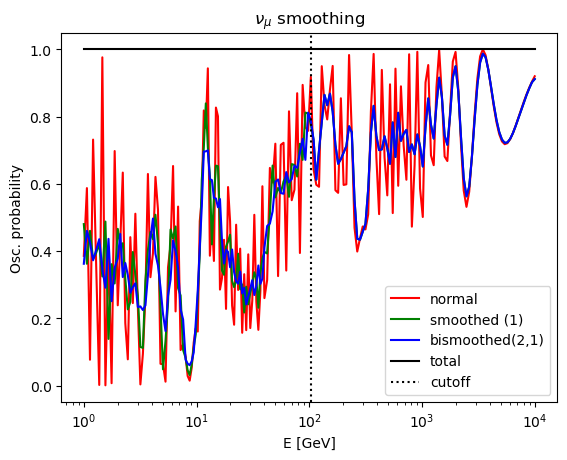

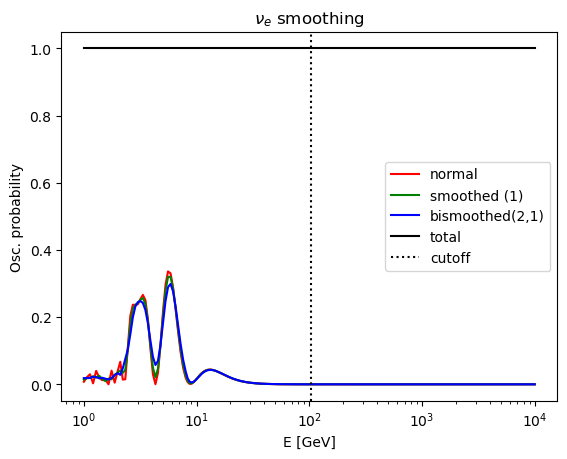

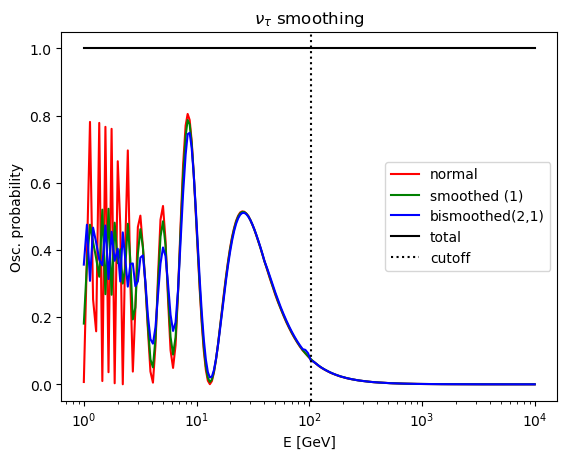

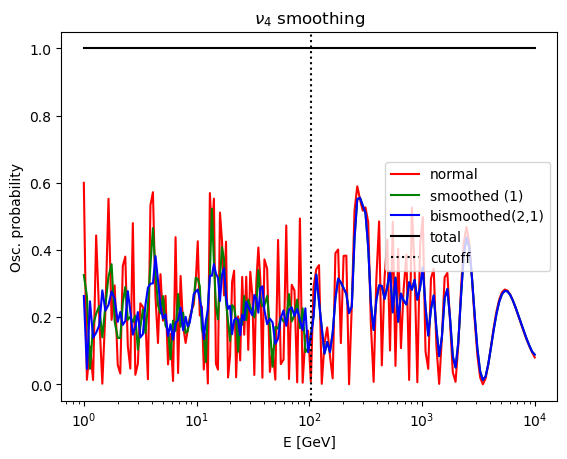

In [17]:
plt.plot(energy_nodes/units.GeV,mu0/tot0,label='normal',color='red')
plt.plot(energy_nodes/units.GeV,mutest00/tottest00,label='smoothed (1)',color='green')
plt.plot(energy_nodes/units.GeV,mutest01/tottest01,label='bismoothed(2,1)',color='blue')
plt.plot(energy_nodes/units.GeV,tottest01/tottest01,label='total',color='black')
plt.axvline(energy_nodes[cutoff]/units.GeV,ls='dotted',label='cutoff',color='black')
plt.xscale('log')
plt.legend()
plt.ylabel('Osc. probability')
plt.xlabel('E [GeV]')
plt.title(r'$\nu_{\mu}$ smoothing')
plt.savefig('Osc_Param_Test_Plots/Smoothing/normal_mu_smooth_comp.png',bbox_inches ='tight')
plt.show()

plt.plot(energy_nodes/units.GeV,e0/tot0,label='normal',color='red')
plt.plot(energy_nodes/units.GeV,etest00/tottest00,label='smoothed (1)',color='green')
plt.plot(energy_nodes/units.GeV,etest01/tottest01,label='bismoothed(2,1)',color='blue')
plt.plot(energy_nodes/units.GeV,tottest01/tottest01,label='total',color='black')
plt.axvline(energy_nodes[cutoff]/units.GeV,ls='dotted',label='cutoff',color='black')
plt.xscale('log')
plt.legend()
plt.ylabel('Osc. probability')
plt.xlabel('E [GeV]')
plt.title(r'$\nu_{e}$ smoothing')
plt.savefig('Osc_Param_Test_Plots/Smoothing/normal_e_smooth_comp.png',bbox_inches ='tight')
plt.show()

plt.plot(energy_nodes/units.GeV,tau0/tot0,label='normal',color='red')
plt.plot(energy_nodes/units.GeV,tautest00/tottest00,label='smoothed (1)',color='green')
plt.plot(energy_nodes/units.GeV,tautest01/tottest01,label='bismoothed(2,1)',color='blue')
plt.plot(energy_nodes/units.GeV,tottest01/tottest01,label='total',color='black')
plt.axvline(energy_nodes[cutoff]/units.GeV,ls='dotted',label='cutoff',color='black')
plt.xscale('log')
plt.legend()
plt.ylabel('Osc. probability')
plt.xlabel('E [GeV]')
plt.title(r'$\nu_{\tau}$ smoothing')
plt.savefig('Osc_Param_Test_Plots/Smoothing/normal_tau_smooth_comp.png',bbox_inches ='tight')
plt.show()

plt.plot(energy_nodes/units.GeV,s0/tot0,label='normal',color='red')
plt.plot(energy_nodes/units.GeV,stest00/tottest00,label='smoothed (1)',color='green')
plt.plot(energy_nodes/units.GeV,stest01/tottest01,label='bismoothed(2,1)',color='blue')
plt.plot(energy_nodes/units.GeV,tottest01/tottest01,label='total',color='black')
plt.axvline(energy_nodes[cutoff]/units.GeV,ls='dotted',label='cutoff',color='black')
plt.xscale('log')
plt.legend()
plt.ylabel('Osc. probability')
plt.xlabel('E [GeV]')
plt.title(r'$\nu_{4}$ smoothing')
plt.savefig('Osc_Param_Test_Plots/Smoothing/normal_s_smooth_comp.png',bbox_inches ='tight')
plt.show()

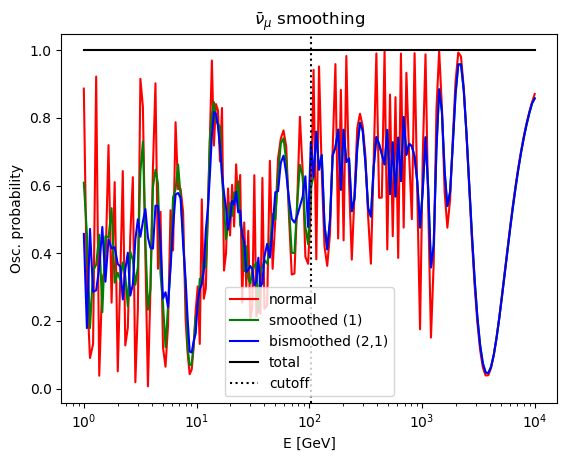

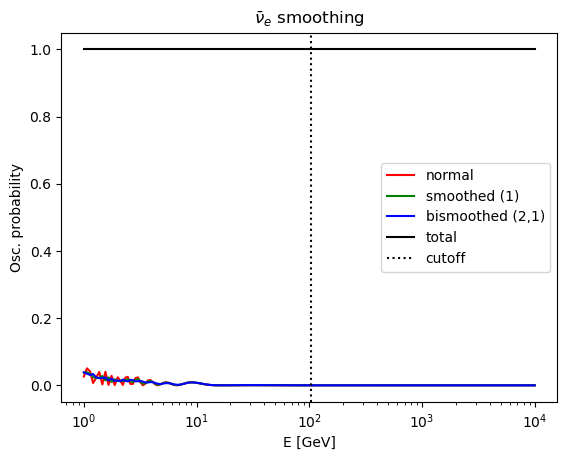

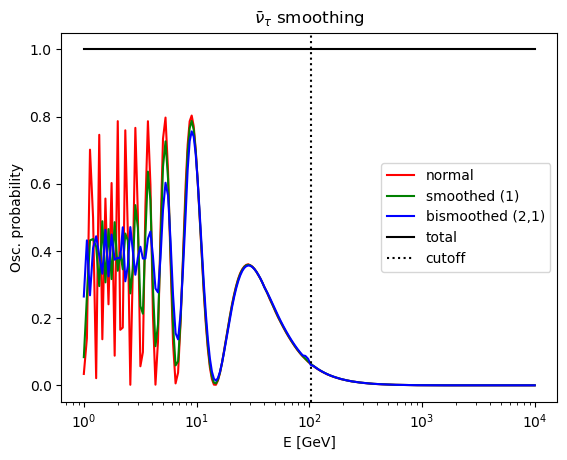

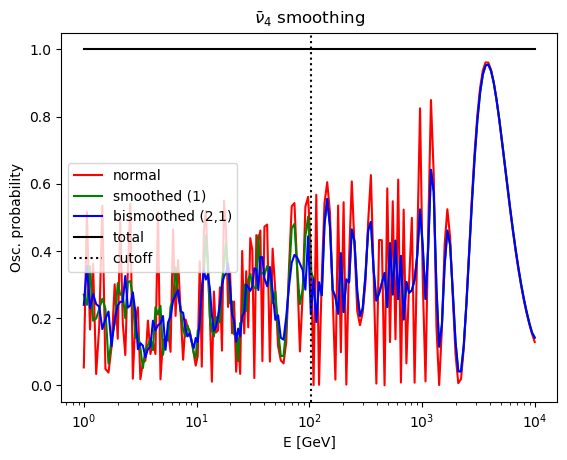

In [18]:
plt.plot(energy_nodes/units.GeV,mu1/tot1,label='normal',color='red')
plt.plot(energy_nodes/units.GeV,mutest10/tottest10,label='smoothed (1)',color='green')
plt.plot(energy_nodes/units.GeV,mutest11/tottest11,label='bismoothed (2,1)',color='blue')
plt.plot(energy_nodes/units.GeV,tottest11/tottest11,label='total',color='black')
plt.axvline(energy_nodes[cutoff]/units.GeV,ls='dotted',label='cutoff',color='black')
plt.xscale('log')
plt.legend()
plt.ylabel('Osc. probability')
plt.xlabel('E [GeV]')
plt.title(r'$\bar{\nu}_{\mu}$ smoothing')
plt.savefig('Osc_Param_Test_Plots/Smoothing/normal_antimu_smooth_comp.png',bbox_inches ='tight')
plt.show()

plt.plot(energy_nodes/units.GeV,e1/tot1,label='normal',color='red')
plt.plot(energy_nodes/units.GeV,etest10/tottest10,label='smoothed (1)',color='green')
plt.plot(energy_nodes/units.GeV,etest11/tottest11,label='bismoothed (2,1)',color='blue')
plt.plot(energy_nodes/units.GeV,tottest11/tottest11,label='total',color='black')
plt.axvline(energy_nodes[cutoff]/units.GeV,ls='dotted',label='cutoff',color='black')
plt.xscale('log')
plt.legend()
plt.ylabel('Osc. probability')
plt.xlabel('E [GeV]')
plt.title(r'$\bar{\nu}_{e}$ smoothing')
plt.savefig('Osc_Param_Test_Plots/Smoothing/normal_antie_smooth_comp.png',bbox_inches ='tight')
plt.show()

plt.plot(energy_nodes/units.GeV,tau1/tot1,label='normal',color='red')
plt.plot(energy_nodes/units.GeV,tautest10/tottest10,label='smoothed (1)',color='green')
plt.plot(energy_nodes/units.GeV,tautest11/tottest11,label='bismoothed (2,1)',color='blue')
plt.plot(energy_nodes/units.GeV,tottest11/tottest11,label='total',color='black')
plt.axvline(energy_nodes[cutoff]/units.GeV,ls='dotted',label='cutoff',color='black')
plt.xscale('log')
plt.legend()
plt.ylabel('Osc. probability')
plt.xlabel('E [GeV]')
plt.title(r'$\bar{\nu}_{\tau}$ smoothing')
plt.savefig('Osc_Param_Test_Plots/Smoothing/normal_antitau_smooth_comp.png',bbox_inches ='tight')
plt.show()

plt.plot(energy_nodes/units.GeV,s1/tot1,label='normal',color='red')
plt.plot(energy_nodes/units.GeV,stest10/tottest10,label='smoothed (1)',color='green')
plt.plot(energy_nodes/units.GeV,stest11/tottest11,label='bismoothed (2,1)',color='blue')
plt.plot(energy_nodes/units.GeV,tottest11/tottest11,label='total',color='black')
plt.axvline(energy_nodes[cutoff]/units.GeV,ls='dotted',label='cutoff',color='black')
plt.xscale('log')
plt.legend()
plt.ylabel('Osc. probability')
plt.xlabel('E [GeV]')
plt.title(r'$\bar{\nu}_{4}$ smoothing')
plt.savefig('Osc_Param_Test_Plots/Smoothing/normal_antis_smooth_comp.png',bbox_inches ='tight')
plt.show()

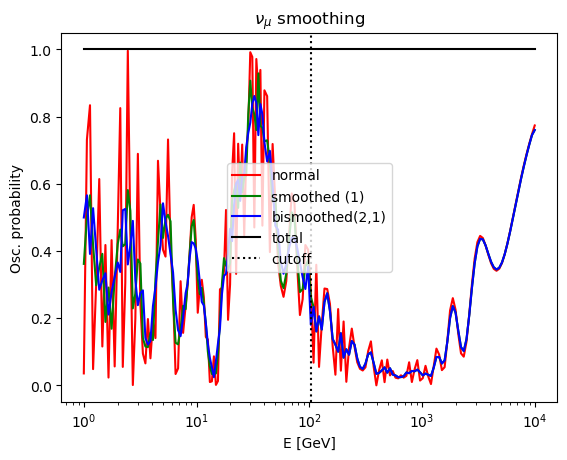

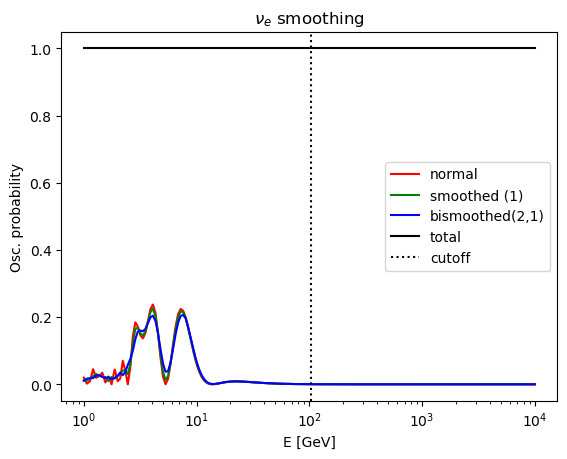

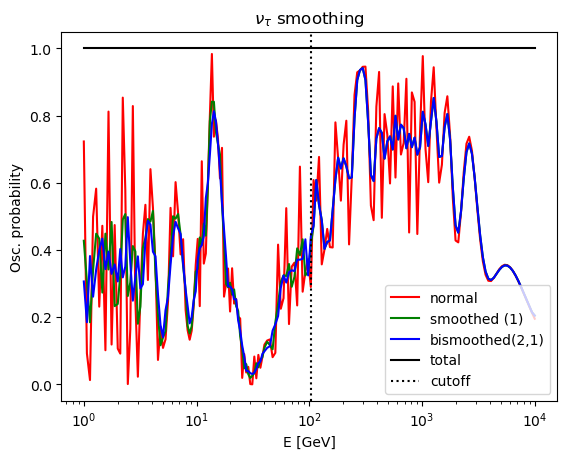

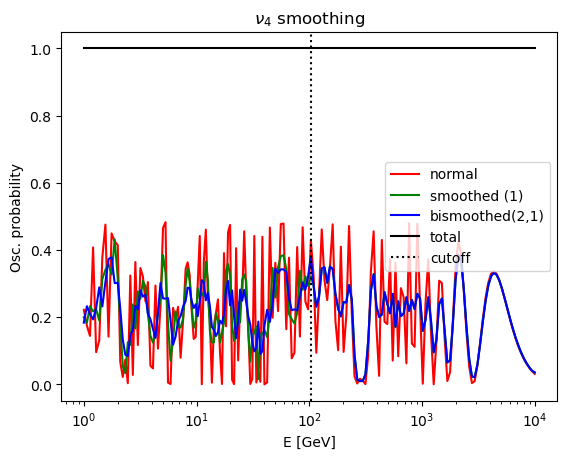

In [19]:
plt.plot(energy_nodes/units.GeV,mu0m/tot0m,label='normal',color='red')
plt.plot(energy_nodes/units.GeV,mutest00m/tottest00m,label='smoothed (1)',color='green')
plt.plot(energy_nodes/units.GeV,mutest01m/tottest01m,label='bismoothed(2,1)',color='blue')
plt.plot(energy_nodes/units.GeV,tottest01m/tottest01m,label='total',color='black')
plt.axvline(energy_nodes[cutoff]/units.GeV,ls='dotted',label='cutoff',color='black')
plt.xscale('log')
plt.legend()
plt.ylabel('Osc. probability')
plt.xlabel('E [GeV]')
plt.title(r'$\nu_{\mu}$ smoothing')
plt.savefig('Osc_Param_Test_Plots/Smoothing/normal_multimu_smooth_comp.png',bbox_inches ='tight')
plt.show()
plt.plot(energy_nodes/units.GeV,e0m/tot0m,label='normal',color='red')
plt.plot(energy_nodes/units.GeV,etest00m/tottest00m,label='smoothed (1)',color='green')
plt.plot(energy_nodes/units.GeV,etest01m/tottest01m,label='bismoothed(2,1)',color='blue')
plt.plot(energy_nodes/units.GeV,tottest01m/tottest01m,label='total',color='black')
plt.axvline(energy_nodes[cutoff]/units.GeV,ls='dotted',label='cutoff',color='black')
plt.xscale('log')
plt.legend()
plt.ylabel('Osc. probability')
plt.xlabel('E [GeV]')
plt.title(r'$\nu_{e}$ smoothing')
plt.savefig('Osc_Param_Test_Plots/Smoothing/normal_multie_smooth_comp.png',bbox_inches ='tight')
plt.show()
plt.plot(energy_nodes/units.GeV,tau0m/tot0m,label='normal',color='red')
plt.plot(energy_nodes/units.GeV,tautest00m/tottest00m,label='smoothed (1)',color='green')
plt.plot(energy_nodes/units.GeV,tautest01m/tottest01m,label='bismoothed(2,1)',color='blue')
plt.plot(energy_nodes/units.GeV,tottest01m/tottest01m,label='total',color='black')
plt.axvline(energy_nodes[cutoff]/units.GeV,ls='dotted',label='cutoff',color='black')
plt.xscale('log')
plt.legend()
plt.ylabel('Osc. probability')
plt.xlabel('E [GeV]')
plt.title(r'$\nu_{\tau}$ smoothing')
plt.savefig('Osc_Param_Test_Plots/Smoothing/normal_multitau_smooth_comp.png',bbox_inches ='tight')
plt.show()
plt.plot(energy_nodes/units.GeV,s0m/tot0m,label='normal',color='red')
plt.plot(energy_nodes/units.GeV,stest00m/tottest00m,label='smoothed (1)',color='green')
plt.plot(energy_nodes/units.GeV,stest01m/tottest01m,label='bismoothed(2,1)',color='blue')
plt.plot(energy_nodes/units.GeV,tottest01m/tottest01m,label='total',color='black')
plt.axvline(energy_nodes[cutoff]/units.GeV,ls='dotted',label='cutoff',color='black')
plt.xscale('log')
plt.legend()
plt.ylabel('Osc. probability')
plt.xlabel('E [GeV]')
plt.title(r'$\nu_{4}$ smoothing')
plt.savefig('Osc_Param_Test_Plots/Smoothing/normal_multis_smooth_comp.png',bbox_inches ='tight')
plt.show()

## Rough vs sensitive averaging

In [20]:
cutoff = 94 # value between 0 and 176
lownodes = 4 #nubmer of nearby nodes to be used in average
highnodes = 2

In [21]:
etest00=smooth(e0,1)
etest01=bismooth(e0,lownodes,highnodes,cutoff)
mutest00=smooth(mu0,1)
mutest01=bismooth(mu0,lownodes,highnodes,cutoff)
tautest00=smooth(tau0,1)
tautest01=bismooth(tau0,lownodes,highnodes,cutoff)
stest00=smooth(s0,1)
stest01=bismooth(s0,lownodes,highnodes,cutoff)
tottest00=smooth(tot0,1)
tottest01=bismooth(tot0,lownodes,highnodes,cutoff)

etest10=smooth(e1,1)
etest11=bismooth(e1,lownodes,highnodes,cutoff)
mutest10=smooth(mu1,1)
mutest11=bismooth(mu1,lownodes,highnodes,cutoff)
tautest10=smooth(tau1,1)
tautest11=bismooth(tau1,lownodes,highnodes,cutoff)
stest10=smooth(s1,1)
stest11=bismooth(s1,lownodes,highnodes,cutoff)
tottest10=smooth(tot1,1)
tottest11=bismooth(tot1,lownodes,highnodes,cutoff)

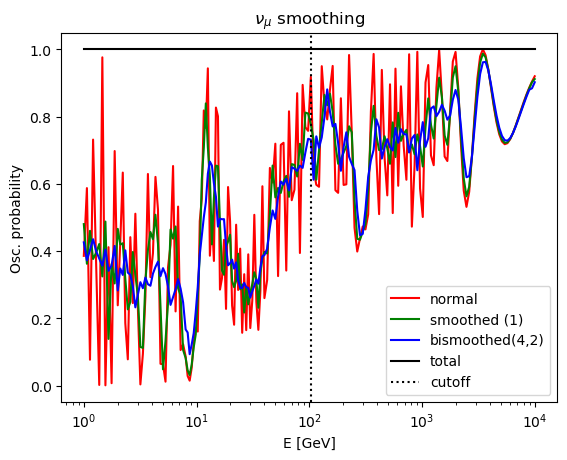

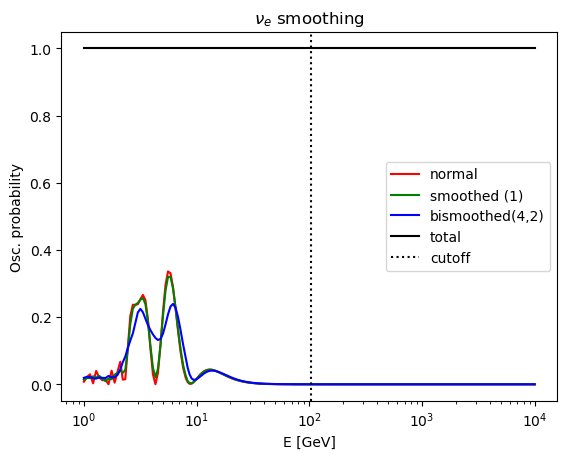

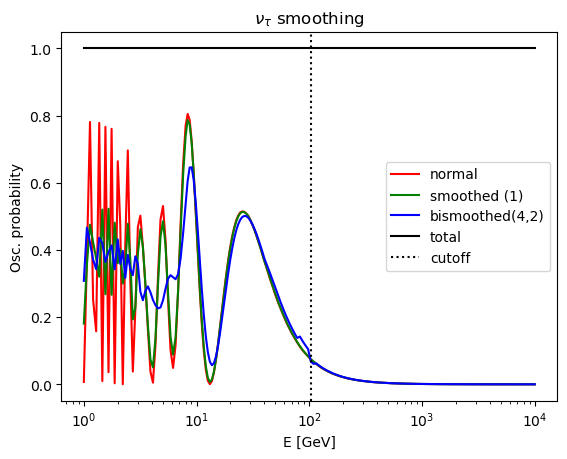

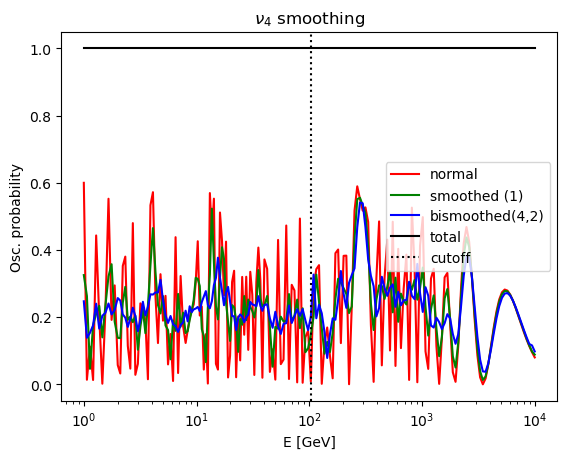

In [22]:
plt.plot(energy_nodes/units.GeV,mu0/tot0,label='normal',color='red')
plt.plot(energy_nodes/units.GeV,mutest00/tottest00,label='smoothed (1)',color='green')
plt.plot(energy_nodes/units.GeV,mutest01/tottest01,label='bismoothed(4,2)',color='blue')
plt.plot(energy_nodes/units.GeV,tottest01/tottest01,label='total',color='black')
plt.axvline(energy_nodes[cutoff]/units.GeV,ls='dotted',label='cutoff',color='black')
plt.xscale('log')
plt.legend()
plt.ylabel('Osc. probability')
plt.xlabel('E [GeV]')
plt.title(r'$\nu_{\mu}$ smoothing')
plt.savefig('Osc_Param_Test_Plots/Smoothing/normal_mu_plussmooth_comp.png',bbox_inches ='tight')
plt.show()
plt.plot(energy_nodes/units.GeV,e0/tot0,label='normal',color='red')
plt.plot(energy_nodes/units.GeV,etest00/tottest00,label='smoothed (1)',color='green')
plt.plot(energy_nodes/units.GeV,etest01/tottest01,label='bismoothed(4,2)',color='blue')
plt.plot(energy_nodes/units.GeV,tottest01/tottest01,label='total',color='black')
plt.axvline(energy_nodes[cutoff]/units.GeV,ls='dotted',label='cutoff',color='black')
plt.xscale('log')
plt.legend()
plt.ylabel('Osc. probability')
plt.xlabel('E [GeV]')
plt.title(r'$\nu_{e}$ smoothing')
plt.savefig('Osc_Param_Test_Plots/Smoothing/normal_e_plussmooth_comp.png',bbox_inches ='tight')
plt.show()
plt.plot(energy_nodes/units.GeV,tau0/tot0,label='normal',color='red')
plt.plot(energy_nodes/units.GeV,tautest00/tottest00,label='smoothed (1)',color='green')
plt.plot(energy_nodes/units.GeV,tautest01/tottest01,label='bismoothed(4,2)',color='blue')
plt.plot(energy_nodes/units.GeV,tottest01/tottest01,label='total',color='black')
plt.axvline(energy_nodes[cutoff]/units.GeV,ls='dotted',label='cutoff',color='black')
plt.xscale('log')
plt.legend()
plt.ylabel('Osc. probability')
plt.xlabel('E [GeV]')
plt.title(r'$\nu_{\tau}$ smoothing')
plt.savefig('Osc_Param_Test_Plots/Smoothing/normal_tau_plussmooth_comp.png',bbox_inches ='tight')
plt.show()
plt.plot(energy_nodes/units.GeV,s0/tot0,label='normal',color='red')
plt.plot(energy_nodes/units.GeV,stest00/tottest00,label='smoothed (1)',color='green')
plt.plot(energy_nodes/units.GeV,stest01/tottest01,label='bismoothed(4,2)',color='blue')
plt.plot(energy_nodes/units.GeV,tottest01/tottest01,label='total',color='black')
plt.axvline(energy_nodes[cutoff]/units.GeV,ls='dotted',label='cutoff',color='black')
plt.xscale('log')
plt.legend()
plt.ylabel('Osc. probability')
plt.xlabel('E [GeV]')
plt.title(r'$\nu_{4}$ smoothing')
plt.savefig('Osc_Param_Test_Plots/Smoothing/normal_s_plussmooth_comp.png',bbox_inches ='tight')

## Histogram averaging, Height averaging

Irrelevant, can't create sensible smooth plots with histograms. Most sensible thing is the to sum small bins and connect with lines = smooth plot already done prior to this! Height averaging relevant above horizon not below!

## Interpolation smoothing

In [23]:
NewE = np.geomspace(1,1e4,10000)*units.GeV

In [24]:
NewF_mu_0_sm = np.array([nsq_atm4_single.EvalFlavor(1,trackangle,EE,0) for EE in NewE])
Tot_0_sm = np.interp(NewE,energy_nodes,tot0)

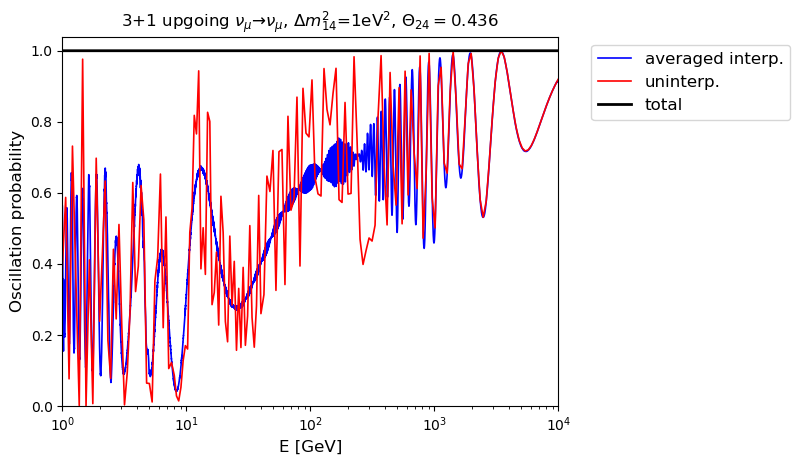

In [25]:
plt.plot(NewE/units.GeV,smooth(NewF_mu_0_sm,25)/smooth(Tot_0_sm,25),label='averaged interp.',color='blue',lw=1.2)
plt.plot(energy_nodes/units.GeV,mu0/tot0,label='uninterp.',color='red',lw=1.2)
plt.plot(NewE/units.GeV,smooth(Tot_0_sm,0)/smooth(Tot_0_sm,0),label='total',color='black',lw=2.)
#plt.plot(NewE/units.GeV,NewF_mu_0_sm/Tot_0_sm,label='original',color='purple')
thlabel = r"$\Theta_{{24}}={test}$".format(test=round(th,3))
plt.xscale('log')
plt.xlim(NewE[0]/units.GeV,NewE[-1]/units.GeV)
plt.ylim(0,1.04)
plt.xlabel(r'E [GeV]', fontsize = 12)
plt.ylabel('Oscillation probability', fontsize = 12)
plt.title(r'3+1 upgoing $\nu_\mu \to \nu_\mu$, $\Delta m_{14}^2$=1eV$^2$, '+thlabel)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize = 12, fancybox =True)
plt.savefig('Osc_Param_Test_Plots/Smoothing/interp_test_smooth_mu4.png',bbox_inches ='tight')

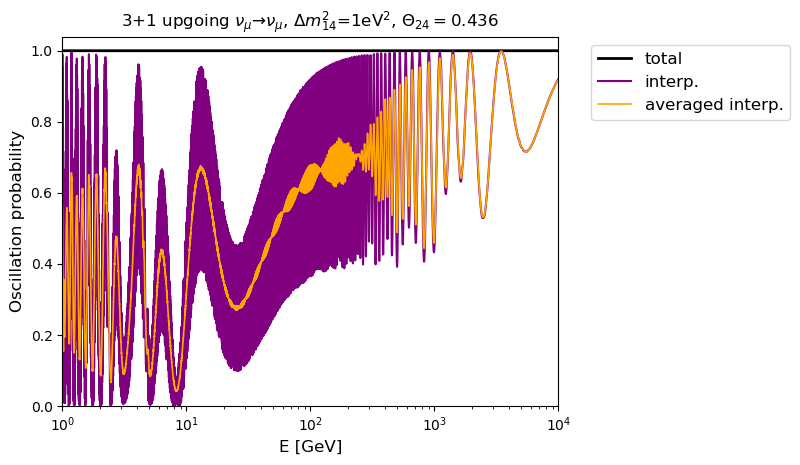

In [26]:
#plt.plot(energy_nodes/units.GeV,mu0/tot0,label='uninterp.',color='red',lw=1.2)
plt.plot(NewE/units.GeV,smooth(Tot_0_sm,0)/smooth(Tot_0_sm,0),label='total',color='black',lw=2.)
plt.plot(NewE/units.GeV,NewF_mu_0_sm/Tot_0_sm,label='interp.',color='purple')
plt.plot(NewE/units.GeV,smooth(NewF_mu_0_sm,25)/smooth(Tot_0_sm,25),label='averaged interp.',color='orange',lw=1.2)
thlabel = r"$\Theta_{{24}}={test}$".format(test=round(th,3))
plt.xscale('log')
plt.xlim(NewE[0]/units.GeV,NewE[-1]/units.GeV)
plt.ylim(0,1.04)
plt.xlabel(r'E [GeV]', fontsize = 12)
plt.ylabel('Oscillation probability', fontsize = 12)
plt.title(r'3+1 upgoing $\nu_\mu \to \nu_\mu$, $\Delta m_{14}^2$=1eV$^2$, '+thlabel)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize = 12, fancybox =True)
plt.savefig('Osc_Param_Test_Plots/Smoothing/interp_test_band.png',bbox_inches ='tight')

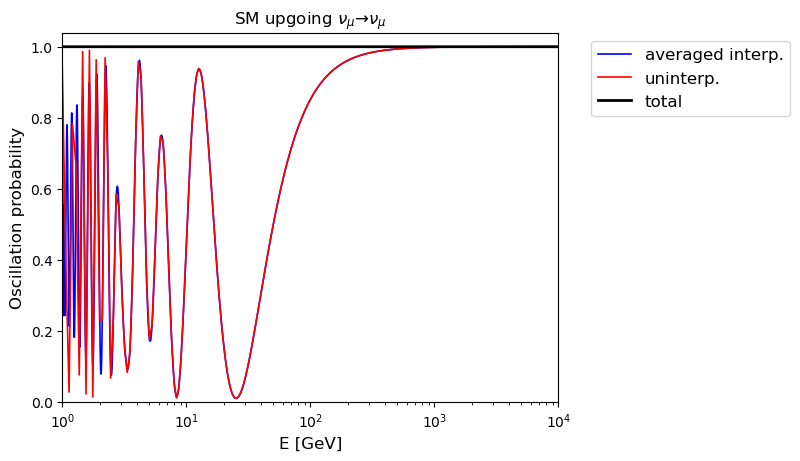

In [27]:
NewF_mu_0_sm = np.array([nsq_atm3_single.EvalFlavor(1,trackangle,EE,0) for EE in NewE])
Tot_0_sm = np.interp(NewE,energy_nodes,tot0)

plt.plot(NewE/units.GeV,smooth(NewF_mu_0_sm,25)/smooth(Tot_0_sm,25),label='averaged interp.',color='blue',lw=1.2)
plt.plot(energy_nodes/units.GeV,phi_single_0_0_mu/total_single_0_0,label='uninterp.',color='red',lw=1.2)
plt.plot(NewE/units.GeV,smooth(Tot_0_sm,0)/smooth(Tot_0_sm,0),label='total',color='black',lw=2.)
#plt.plot(NewE/units.GeV,NewF_mu_0_sm/Tot_0_sm,label='original',color='purple')
thlabel = r"$\Theta_{{24}}={test}$".format(test=round(th,3))
plt.xscale('log')
plt.xlim(NewE[0]/units.GeV,NewE[-1]/units.GeV)
plt.ylim(0,1.04)
plt.xlabel(r'E [GeV]', fontsize = 12)
plt.ylabel('Oscillation probability', fontsize = 12)
plt.title(r'SM upgoing $\nu_\mu \to \nu_\mu$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize = 12, fancybox =True)
plt.savefig('Osc_Param_Test_Plots/Smoothing/interp_test_smooth_musm.png',bbox_inches ='tight')

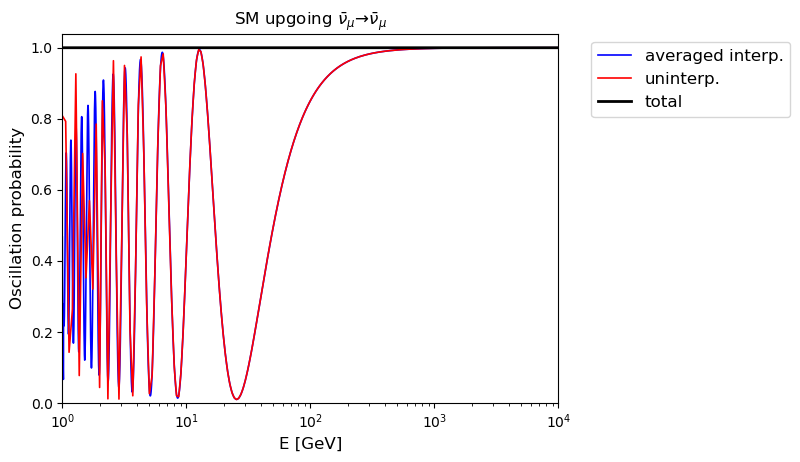

In [28]:
NewF_mu_0_sm = np.array([nsq_atm3_single.EvalFlavor(1,trackangle,EE,1) for EE in NewE])
Tot_0_sm = np.interp(NewE,energy_nodes,tot1)

plt.plot(NewE/units.GeV,smooth(NewF_mu_0_sm,25)/smooth(Tot_0_sm,25),label='averaged interp.',color='blue',lw=1.2)
plt.plot(energy_nodes/units.GeV,phi_single_0_1_mu/total_single_0_1,label='uninterp.',color='red',lw=1.2)
plt.plot(NewE/units.GeV,smooth(Tot_0_sm,0)/smooth(Tot_0_sm,0),label='total',color='black',lw=2.)
#plt.plot(NewE/units.GeV,NewF_mu_0_sm/Tot_0_sm,label='original',color='purple')
thlabel = r"$\Theta_{{24}}={test}$".format(test=round(th,3))
plt.xscale('log')
plt.xlim(NewE[0]/units.GeV,NewE[-1]/units.GeV)
plt.ylim(0,1.04)
plt.xlabel(r'E [GeV]', fontsize = 12)
plt.ylabel('Oscillation probability', fontsize = 12)
plt.title(r'SM upgoing $\bar{\nu}_\mu \to \bar{\nu}_\mu$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize = 12, fancybox =True)
plt.savefig('Osc_Param_Test_Plots/Smoothing/interp_test_smooth_antimusm.png',bbox_inches ='tight')

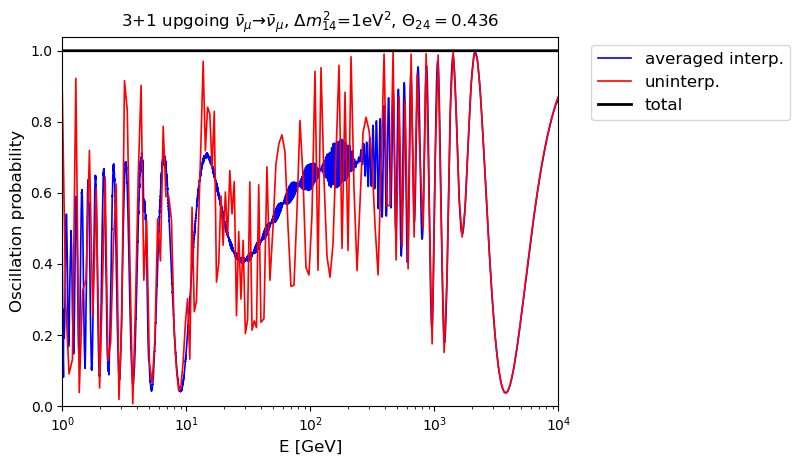

In [29]:
NewF_mu_0_sm = np.array([nsq_atm4_single.EvalFlavor(1,trackangle,EE,1) for EE in NewE])
Tot_0_sm = np.interp(NewE,energy_nodes,tot1)

plt.plot(NewE/units.GeV,smooth(NewF_mu_0_sm,25)/smooth(Tot_0_sm,25),label='averaged interp.',color='blue',lw=1.2)
plt.plot(energy_nodes/units.GeV,phi_single_1_1_mu/total_single_1_1,label='uninterp.',color='red',lw=1.2)
plt.plot(NewE/units.GeV,smooth(Tot_0_sm,0)/smooth(Tot_0_sm,0),label='total',color='black',lw=2.)
#plt.plot(NewE/units.GeV,NewF_mu_0_sm/Tot_0_sm,label='original',color='purple')
thlabel = r"$\Theta_{{24}}={test}$".format(test=round(th,3))
plt.xscale('log')
plt.xlim(NewE[0]/units.GeV,NewE[-1]/units.GeV)
plt.ylim(0,1.04)
plt.xlabel(r'E [GeV]', fontsize = 12)
plt.ylabel('Oscillation probability', fontsize = 12)
plt.title(r'3+1 upgoing $\bar{\nu}_\mu \to \bar{\nu}_\mu$, $\Delta m_{14}^2$=1eV$^2$, '+thlabel)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize = 12, fancybox =True)
plt.savefig('Osc_Param_Test_Plots/Smoothing/interp_test_smooth_antimu4.png',bbox_inches ='tight')

In [30]:
## Smoothed 24 osc. vs 24+34 osc at low values -> evolution

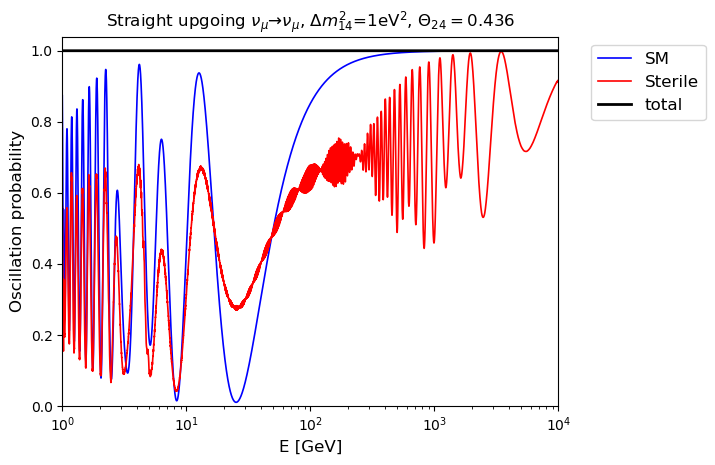

In [31]:
SM = np.array([nsq_atm3_single.EvalFlavor(1,trackangle,EE,0) for EE in NewE])
Sterile = np.array([nsq_atm4_single.EvalFlavor(1,trackangle,EE,0) for EE in NewE])
Tot_0_sm = np.interp(NewE,energy_nodes,total_single_0_0)
Tot_0_st = np.interp(NewE,energy_nodes,total_single_1_0)

plt.plot(NewE/units.GeV,smooth(SM,25)/smooth(Tot_0_sm,25),label='SM',color='blue',lw=1.2)
plt.plot(NewE/units.GeV,smooth(Sterile,25)/smooth(Tot_0_st,25),label='Sterile',color='red',lw=1.2)
plt.plot(NewE/units.GeV,smooth(Tot_0_sm,0)/smooth(Tot_0_sm,0),label='total',color='black',lw=2.)
#plt.plot(NewE/units.GeV,NewF_mu_0_sm/Tot_0_sm,label='original',color='purple')
thlabel = r"$\Theta_{{24}}={test}$".format(test=round(th,3))
plt.xscale('log')
plt.xlim(NewE[0]/units.GeV,NewE[-1]/units.GeV)
plt.ylim(0,1.04)
plt.xlabel(r'E [GeV]', fontsize = 12)
plt.ylabel('Oscillation probability', fontsize = 12)
plt.title(r'Straight upgoing $\nu_\mu \to \nu_\mu$, $\Delta m_{14}^2$=1eV$^2$, '+thlabel)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize = 12, fancybox =True)
plt.savefig('Osc_Param_Test_Plots/Smoothing/th24_{test}_smoothed_prob_diff_mu.png'.format(test=round(th,3)),bbox_inches ='tight')

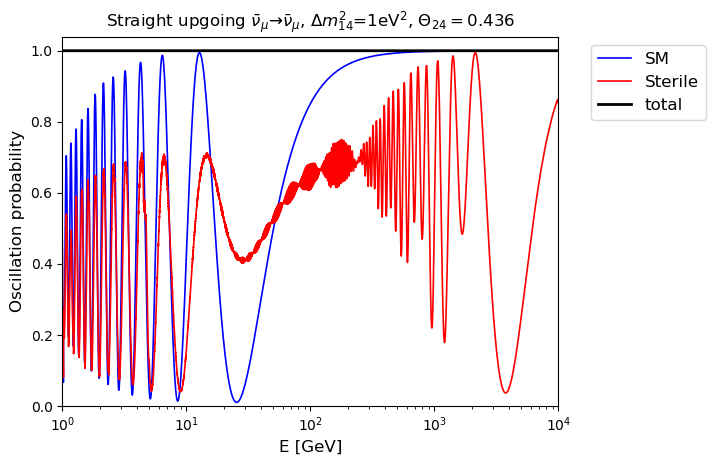

In [32]:
SM = np.array([nsq_atm3_single.EvalFlavor(1,trackangle,EE,1) for EE in NewE])
Sterile = np.array([nsq_atm4_single.EvalFlavor(1,trackangle,EE,1) for EE in NewE])
Tot_0_sm = np.interp(NewE,energy_nodes,total_single_0_0)
Tot_0_st = np.interp(NewE,energy_nodes,total_single_1_0)

plt.plot(NewE/units.GeV,smooth(SM,25)/smooth(Tot_0_sm,25),label='SM',color='blue',lw=1.2)
plt.plot(NewE/units.GeV,smooth(Sterile,25)/smooth(Tot_0_st,25),label='Sterile',color='red',lw=1.2)
plt.plot(NewE/units.GeV,smooth(Tot_0_sm,0)/smooth(Tot_0_sm,0),label='total',color='black',lw=2.)
#plt.plot(NewE/units.GeV,NewF_mu_0_sm/Tot_0_sm,label='original',color='purple')
thlabel = r"$\Theta_{{24}}={test}$".format(test=round(th,3))
plt.xscale('log')
plt.xlim(NewE[0]/units.GeV,NewE[-1]/units.GeV)
plt.ylim(0,1.04)
plt.xlabel(r'E [GeV]', fontsize = 12)
plt.ylabel('Oscillation probability', fontsize = 12)
plt.title(r'Straight upgoing $\bar{\nu}_\mu \to \bar{\nu}_\mu$, $\Delta m_{14}^2$=1eV$^2$, '+thlabel)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize = 12, fancybox =True)
plt.savefig('Osc_Param_Test_Plots/Smoothing/th24_{test}_smoothed_prob_diff_antimu.png'.format(test=round(th,3)),bbox_inches ='tight')

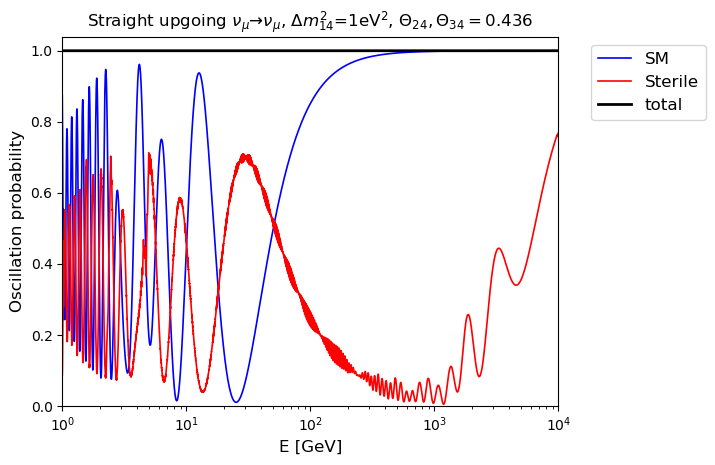

In [33]:
SM = np.array([nsq_atm3_multi.EvalFlavor(1,trackangle,EE,0) for EE in NewE])
Sterile = np.array([nsq_atm4_multi.EvalFlavor(1,trackangle,EE,0) for EE in NewE])
Tot_0_sm = np.interp(NewE,energy_nodes,total_single_0_0)
Tot_0_st = np.interp(NewE,energy_nodes,total_single_1_0)

plt.plot(NewE/units.GeV,smooth(SM,25)/smooth(Tot_0_sm,25),label='SM',color='blue',lw=1.2)
plt.plot(NewE/units.GeV,smooth(Sterile,25)/smooth(Tot_0_st,25),label='Sterile',color='red',lw=1.2)
plt.plot(NewE/units.GeV,smooth(Tot_0_sm,0)/smooth(Tot_0_sm,0),label='total',color='black',lw=2.)
#plt.plot(NewE/units.GeV,NewF_mu_0_sm/Tot_0_sm,label='original',color='purple')
thlabel = r"$\Theta_{{24}},\Theta_{{34}}={test}$".format(test=round(th,3))
plt.xscale('log')
plt.xlim(NewE[0]/units.GeV,NewE[-1]/units.GeV)
plt.ylim(0,1.04)
plt.xlabel(r'E [GeV]', fontsize = 12)
plt.ylabel('Oscillation probability', fontsize = 12)
plt.title(r'Straight upgoing $\nu_\mu \to \nu_\mu$, $\Delta m_{14}^2$=1eV$^2$, '+thlabel)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize = 12, fancybox =True)
plt.savefig('Osc_Param_Test_Plots/Smoothing/th2434_{test}_smoothed_prob_diff_mu.png'.format(test=round(th,3)),bbox_inches ='tight')

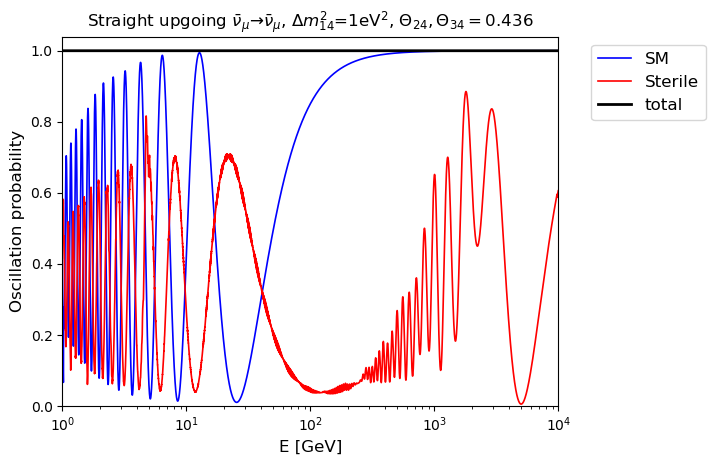

In [34]:
SM = np.array([nsq_atm3_multi.EvalFlavor(1,trackangle,EE,1) for EE in NewE])
Sterile = np.array([nsq_atm4_multi.EvalFlavor(1,trackangle,EE,1) for EE in NewE])
Tot_0_sm = np.interp(NewE,energy_nodes,total_single_0_0)
Tot_0_st = np.interp(NewE,energy_nodes,total_single_1_0)

plt.plot(NewE/units.GeV,smooth(SM,25)/smooth(Tot_0_sm,25),label='SM',color='blue',lw=1.2)
plt.plot(NewE/units.GeV,smooth(Sterile,25)/smooth(Tot_0_st,25),label='Sterile',color='red',lw=1.2)
plt.plot(NewE/units.GeV,smooth(Tot_0_sm,0)/smooth(Tot_0_sm,0),label='total',color='black',lw=2.)
#plt.plot(NewE/units.GeV,NewF_mu_0_sm/Tot_0_sm,label='original',color='purple')
thlabel = r"$\Theta_{{24}},\Theta_{{34}}={test}$".format(test=round(th,3))
plt.xscale('log')
plt.xlim(NewE[0]/units.GeV,NewE[-1]/units.GeV)
plt.ylim(0,1.04)
plt.xlabel(r'E [GeV]', fontsize = 12)
plt.ylabel('Oscillation probability', fontsize = 12)
plt.title(r'Straight upgoing $\bar{\nu}_\mu \to \bar{\nu}_\mu$, $\Delta m_{14}^2$=1eV$^2$, '+thlabel)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize = 12, fancybox =True)
plt.savefig('Osc_Param_Test_Plots/Smoothing/th2434_{test}_smoothed_prob_diff_antimu.png'.format(test=round(th,3)),bbox_inches ='tight')

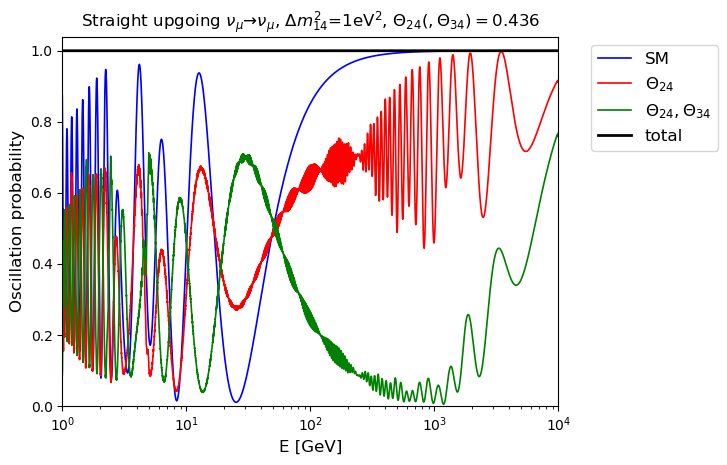

In [35]:
SM = np.array([nsq_atm3_single.EvalFlavor(1,trackangle,EE,0) for EE in NewE])
Sterile = np.array([nsq_atm4_single.EvalFlavor(1,trackangle,EE,0) for EE in NewE])
Tot_0_sm = np.interp(NewE,energy_nodes,total_single_0_0)
Tot_0_st = np.interp(NewE,energy_nodes,total_single_1_0)
SterileM = np.array([nsq_atm4_multi.EvalFlavor(1,trackangle,EE,0) for EE in NewE])

plt.plot(NewE/units.GeV,smooth(SM,25)/smooth(Tot_0_sm,25),label='SM',color='blue',lw=1.2)
plt.plot(NewE/units.GeV,smooth(Sterile,25)/smooth(Tot_0_st,25),label=r'$\Theta_{24}$',color='red',lw=1.2)
plt.plot(NewE/units.GeV,smooth(SterileM,25)/smooth(Tot_0_st,25),label=r'$\Theta_{24},\Theta_{34}$',color='green',lw=1.2)
plt.plot(NewE/units.GeV,smooth(Tot_0_sm,0)/smooth(Tot_0_sm,0),label='total',color='black',lw=2.)

thlabel = r"$\Theta_{{24}} (, \Theta_{{34}})={test}$".format(test=round(th,3))
plt.xscale('log')
plt.xlim(NewE[0]/units.GeV,NewE[-1]/units.GeV)
plt.ylim(0,1.04)
plt.xlabel(r'E [GeV]', fontsize = 12)
plt.ylabel('Oscillation probability', fontsize = 12)
plt.title(r'Straight upgoing $\nu_\mu \to \nu_\mu$, $\Delta m_{14}^2$=1eV$^2$, '+thlabel)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize = 12, fancybox =True)
plt.savefig('Osc_Param_Test_Plots/Smoothing/th24_2434_{test}_smoothed_prob_diff_mu.png'.format(test=round(th,3)),bbox_inches ='tight')

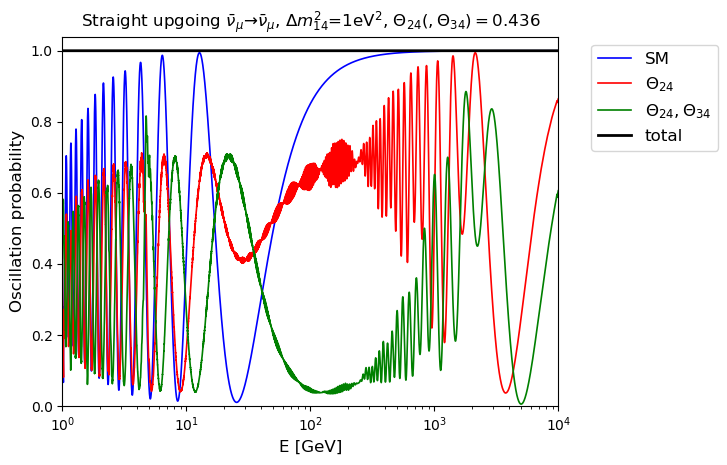

In [36]:
SM1 = np.array([nsq_atm3_single.EvalFlavor(1,trackangle,EE,1) for EE in NewE])
Sterile1 = np.array([nsq_atm4_single.EvalFlavor(1,trackangle,EE,1) for EE in NewE])
Tot_1_sm = np.interp(NewE,energy_nodes,total_single_0_0)
Tot_1_st = np.interp(NewE,energy_nodes,total_single_1_0)
SterileM1 = np.array([nsq_atm4_multi.EvalFlavor(1,trackangle,EE,1) for EE in NewE])

plt.plot(NewE/units.GeV,smooth(SM1,25)/smooth(Tot_1_sm,25),label='SM',color='blue',lw=1.2)
plt.plot(NewE/units.GeV,smooth(Sterile1,25)/smooth(Tot_1_st,25),label=r'$\Theta_{24}$',color='red',lw=1.2)
plt.plot(NewE/units.GeV,smooth(SterileM1,25)/smooth(Tot_1_st,25),label=r'$\Theta_{24},\Theta_{34}$',color='green',lw=1.2)
plt.plot(NewE/units.GeV,smooth(Tot_1_sm,0)/smooth(Tot_1_sm,0),label='total',color='black',lw=2.)

thlabel = r"$\Theta_{{24}} (, \Theta_{{34}})={test}$".format(test=round(th,3))
plt.xscale('log')
plt.xlim(NewE[0]/units.GeV,NewE[-1]/units.GeV)
plt.ylim(0,1.04)
plt.xlabel(r'E [GeV]', fontsize = 12)
plt.ylabel('Oscillation probability', fontsize = 12)
plt.title(r'Straight upgoing $\bar{\nu}_\mu \to \bar{\nu}_\mu$, $\Delta m_{14}^2$=1eV$^2$, '+thlabel)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize = 12, fancybox =True)
plt.savefig('Osc_Param_Test_Plots/Smoothing/th24_2434_{test}_smoothed_prob_diff_antimu.png'.format(test=round(th,3)),bbox_inches ='tight')

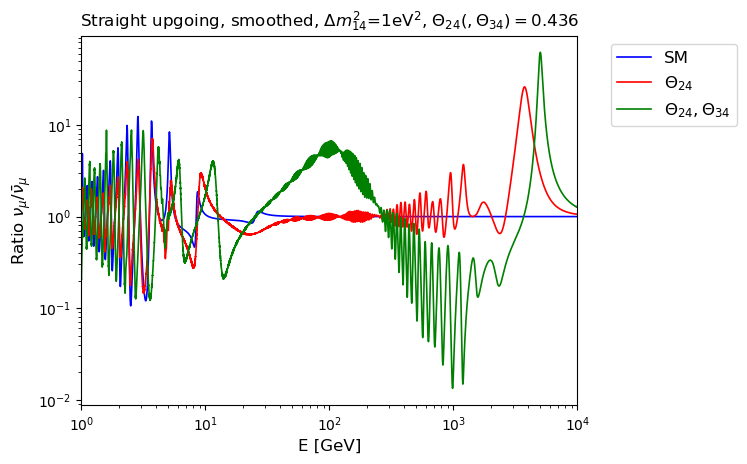

In [37]:
plt.plot(NewE/units.GeV,smooth(SM,25)/smooth(SM1,25),label='SM',color='blue',lw=1.2)
plt.plot(NewE/units.GeV,smooth(Sterile,25)/smooth(Sterile1,25),label=r'$\Theta_{24}$',color='red',lw=1.2)
plt.plot(NewE/units.GeV,smooth(SterileM,25)/smooth(SterileM1,25),label=r'$\Theta_{24},\Theta_{34}$',color='green',lw=1.2)
thlabel = r"$\Theta_{{24}} (, \Theta_{{34}})={test}$".format(test=round(th,3))
plt.xscale('log')
plt.xlim(NewE[0]/units.GeV,NewE[-1]/units.GeV)
plt.yscale('log')
plt.xlabel(r'E [GeV]', fontsize = 12)
plt.ylabel(r'Ratio $\nu_\mu / \bar{\nu}_\mu$', fontsize = 12)
plt.title(r'Straight upgoing, smoothed, $\Delta m_{14}^2$=1eV$^2$, '+thlabel)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize = 12, fancybox =True)
plt.savefig('Osc_Param_Test_Plots/Smoothing/th24_2434_{test}_smoothed_ratio.png'.format(test=round(th,3)),bbox_inches ='tight')

## $\Theta$ range plotseries + GIF (24,34)

In [38]:
thrange = np.linspace(5,45,9)/180*np.pi
energy_nodes=NewNodes(2)
NewEs = np.geomspace(1,1e4,10000)*units.GeV
cth_nodes = cos_range_opt
interactions = False
neutrino_flavors = 4 #sterile
trackangle = -1.0
Numnus = 1e18
Power = -2.0

plotflag = False

In [39]:
if plotflag == True:

    for th in thrange[0:1]:
        #object creation
        nsq_atm3_single =nuSQUIDSTools.ExtNuSQUIDSAtm(cth_nodes,energy_nodes,3,nsq.NeutrinoType.both,interactions) #SM case
        nsq_atm4_single =nuSQUIDSTools.ExtNuSQUIDSAtm(cth_nodes,energy_nodes,4,nsq.NeutrinoType.both,interactions) #sterile case
        nsq_atm4_multi =nuSQUIDSTools.ExtNuSQUIDSAtm(cth_nodes,energy_nodes,4,nsq.NeutrinoType.both,interactions) #sterile case
        
        #mixing parameters
        nsq_atm3_single.Set_MixingParametersToDefault()
        nsq_atm4_single.Set_MixingParametersToDefault()
        MixParamsS=ChangeMixingParams(nsq_atm4_single) 
        MixParamsS.Mass(3,1.) 
        MixParamsS.Angle(1,3,th) 
        MixParamsM=ChangeMixingParams(nsq_atm4_multi) 
        MixParamsM.Mass(3,1.)
        MixParamsM.Angle(1,3,th) 
        MixParamsM.Angle(2,3,th) 
        
        #initial conditions
        IFlux3=SetIniFlux(nsq_atm3_single,1,"both",Numnus,Power) 
        IFlux4S=SetIniFlux(nsq_atm4_single,1,"both",Numnus,Power) 
        IFlux4M=SetIniFlux(nsq_atm4_multi,1,"both",Numnus,Power)    
        nsq_atm3_single.Set_initial_state(IFlux3,nsq.Basis.flavor)
        nsq_atm4_single.Set_initial_state(IFlux4S,nsq.Basis.flavor)
        nsq_atm4_multi.Set_initial_state(IFlux4M,nsq.Basis.flavor)
        
        #evolve states
        temp=t.time()
        nsq_atm3_single.Set_rel_error(1.0e-5) 
        nsq_atm3_single.Set_abs_error(1.0e-5)
        nsq_atm4_single.Set_rel_error(1.0e-5) 
        nsq_atm4_single.Set_abs_error(1.0e-5)
        nsq_atm4_multi.Set_rel_error(1.0e-5) 
        nsq_atm4_multi.Set_abs_error(1.0e-5)
        nsq_atm3_single.EvolveState()
        nsq_atm4_single.EvolveState()
        nsq_atm4_multi.EvolveState()
        print(t.time()-temp,"s") 
        
        #Get Fluxes
        Plots_single_0 = nuPlots(nsq_atm3_single) #SM fluxes
        Flux_single_0_0_mu = Plots_single_0.Get_Flux(trackangle,0,NewEs)
        Flux_single_0_1_mu = Plots_single_0.Get_Flux(trackangle,1,NewEs)
        Plots_single_1 = nuPlots(nsq_atm4_single) #sterile fluxes
        Flux_single_1_0_mu = Plots_single_1.Get_Flux(trackangle,0,NewEs)  
        Flux_single_1_1_mu = Plots_single_1.Get_Flux(trackangle,1,NewEs)  
        Plots_multi_1 = nuPlots(nsq_atm4_multi) #sterile fluxes
        Flux_multi_1_0_mu = Plots_multi_1.Get_Flux(trackangle,0,NewEs)  
        Flux_multi_1_1_mu = Plots_multi_1.Get_Flux(trackangle,1,NewEs)   
        
        phi_single_0_0_mu, total_single_0_0_mu = Flux_single_0_0_mu[1], Flux_single_0_0_mu[3] #mu sm
        phi_single_0_1_mu, total_single_0_1_mu = Flux_single_0_1_mu[1], Flux_single_0_1_mu[3] #antimu sm
        phi_single_1_0_mu, total_single_1_0_mu = Flux_single_1_0_mu[1], Flux_single_1_0_mu[4] #mu th24
        phi_single_1_1_mu, total_single_1_1_mu = Flux_single_1_1_mu[1], Flux_single_1_1_mu[4] #antimu th24
        phi_multi_1_0_mu, total_multi_1_0_mu = Flux_multi_1_0_mu[1], Flux_multi_1_0_mu[4] #mu th24 th34
        phi_multi_1_1_mu, total_multi_1_1_mu = Flux_multi_1_1_mu[1], Flux_multi_1_1_mu[4] #antimu th24 th34
                
        #plotsection   
        plt.plot(NewEs/units.GeV,smooth(phi_single_0_0_mu,25)/smooth(total_single_0_0_mu,25),label='SM',color='blue',lw=1.2)
        plt.plot(NewEs/units.GeV,smooth(phi_single_1_0_mu,25)/smooth(total_single_1_0_mu,25),label=r'$\Theta_{{24}}={test}$'.format(test=round(th,3)),color='red',lw=1.2)
        plt.plot(NewEs/units.GeV,smooth(phi_multi_1_0_mu,25)/smooth(total_multi_1_0_mu,25),label=r'$\Theta_{{24}},\Theta_{{34}}={test}$'.format(test=round(th,3)),color='green',lw=1.2)
        plt.plot(NewEs/units.GeV,smooth(total_multi_1_0_mu,0)/smooth(total_multi_1_0_mu,0),label='total',color='black',lw=2.)
        plt.xscale('log')
        plt.xlim(NewEs[0]/units.GeV,NewEs[-1]/units.GeV)
        plt.ylim(0,1.04)
        plt.xlabel(r'E [GeV]', fontsize = 12)
        plt.ylabel('Oscillation probability', fontsize = 12)
        plt.title(r'Straight upgoing, smoothed $\nu_\mu \to \nu_\mu$, $\Delta m_{14}^2$=1eV$^2$, $\nu_\mu$ initial')
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize = 12, fancybox =True)
        plt.savefig('Osc_Param_Test_Plots/Smoothing/{test}_th24v2434_smoothed_prob_diff_mu.png'.format(test=round(th,3)),bbox_inches ='tight')
        plt.show()
        plt.close()

        plt.plot(NewEs/units.GeV,smooth(phi_single_0_1_mu,25)/smooth(total_single_0_1_mu,25),label='SM',color='blue',lw=1.2)
        plt.plot(NewEs/units.GeV,smooth(phi_single_1_1_mu,25)/smooth(total_single_1_1_mu,25),label=r'$\Theta_{{24}}={test}$'.format(test=round(th,3)),color='red',lw=1.2)
        plt.plot(NewEs/units.GeV,smooth(phi_multi_1_1_mu,25)/smooth(total_multi_1_1_mu,25),label=r'$\Theta_{{24}},\Theta_{{34}}={test}$'.format(test=round(th,3)),color='green',lw=1.2)
        plt.plot(NewEs/units.GeV,smooth(total_multi_1_1_mu,0)/smooth(total_multi_1_1_mu,0),label='total',color='black',lw=2.)
        plt.xscale('log')
        plt.xlim(NewEs[0]/units.GeV,NewEs[-1]/units.GeV)
        plt.ylim(0,1.04)
        plt.xlabel(r'E [GeV]', fontsize = 12)
        plt.ylabel('Oscillation probability', fontsize = 12)
        plt.title(r'Straight upgoing, smoothed $\bar{\nu}_\mu \to \bar{\nu}_\mu$, $\Delta m_{14}^2$=1eV$^2$, $\bar{\nu}_\mu$ initial')
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize = 12, fancybox =True)
        plt.savefig('Osc_Param_Test_Plots/Smoothing/{test}_th24v2434_smoothed_prob_diff_antimu.png'.format(test=round(th,3)),bbox_inches ='tight')
        plt.show()
        plt.close()
        
        plt.plot(NewEs/units.GeV,smooth(phi_single_0_0_mu,25)/smooth(phi_single_0_1_mu,25),label='SM',color='blue',lw=1.2)
        plt.plot(NewEs/units.GeV,smooth(phi_single_1_0_mu,25)/smooth(phi_single_1_1_mu,25),label=r'$\Theta_{{24}}={test}$'.format(test=round(th,3)),color='red',lw=1.2)
        plt.plot(NewEs/units.GeV,smooth(phi_multi_1_0_mu,25)/smooth(phi_multi_1_1_mu,25),label=r'$\Theta_{{24}},\Theta_{{34}}={test}$'.format(test=round(th,3)),color='green',lw=1.2)
        plt.xscale('log')
        plt.xlim(NewEs[0]/units.GeV,NewEs[-1]/units.GeV)
        plt.yscale('log')
        plt.xlabel(r'E [GeV]', fontsize = 12)
        plt.ylabel(r'Ratio $\nu_\mu / \bar{\nu}_\mu$', fontsize = 12)
        plt.title(r'Straight upgoing, smoothed, $\Delta m_{14}^2$=1eV$^2$, $\nu_\mu / \bar{\nu}_\mu$ initial')
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize = 12, fancybox =True)
        plt.savefig('Osc_Param_Test_Plots/Smoothing/{test}_th24v2434_smoothed_prob_ratio_muanti.png'.format(test=round(th,3)),bbox_inches ='tight')
        plt.show()
        plt.close()       

## $\Theta$ range plotseries + GIF (14,24)
### 14 angle less relevant due to difficulty of reconstructing y for a cascade like track

In [40]:
plotflag1 = False

if plotflag1 == True:

    for th in thrange:
        #object creation
        nsq_atm3_single =nuSQUIDSTools.ExtNuSQUIDSAtm(cth_nodes,energy_nodes,3,nsq.NeutrinoType.both,interactions) #SM case
        nsq_atm4_single =nuSQUIDSTools.ExtNuSQUIDSAtm(cth_nodes,energy_nodes,4,nsq.NeutrinoType.both,interactions) #sterile case
        nsq_atm4_multi =nuSQUIDSTools.ExtNuSQUIDSAtm(cth_nodes,energy_nodes,4,nsq.NeutrinoType.both,interactions) #sterile case
        
        #mixing parameters
        nsq_atm3_single.Set_MixingParametersToDefault()
        nsq_atm4_single.Set_MixingParametersToDefault()
        MixParamsS=ChangeMixingParams(nsq_atm4_single) 
        MixParamsS.Mass(3,1.) 
        MixParamsS.Angle(1,3,th) 
        MixParamsM=ChangeMixingParams(nsq_atm4_multi) 
        MixParamsM.Mass(3,1.)
        MixParamsM.Angle(1,3,th) 
        MixParamsM.Angle(0,3,th) 
        
        #initial conditions
        IFlux3=SetIniFlux(nsq_atm3_single,1,"both",Numnus,Power) 
        IFlux4S=SetIniFlux(nsq_atm4_single,1,"both",Numnus,Power) 
        IFlux4M=SetIniFlux(nsq_atm4_multi,1,"both",Numnus,Power)    
        nsq_atm3_single.Set_initial_state(IFlux3,nsq.Basis.flavor)
        nsq_atm4_single.Set_initial_state(IFlux4S,nsq.Basis.flavor)
        nsq_atm4_multi.Set_initial_state(IFlux4M,nsq.Basis.flavor)
        
        #evolve states
        temp=t.time()
        nsq_atm3_single.Set_rel_error(1.0e-5) 
        nsq_atm3_single.Set_abs_error(1.0e-5)
        nsq_atm4_single.Set_rel_error(1.0e-5) 
        nsq_atm4_single.Set_abs_error(1.0e-5)
        nsq_atm4_multi.Set_rel_error(1.0e-5) 
        nsq_atm4_multi.Set_abs_error(1.0e-5)
        nsq_atm3_single.EvolveState()
        nsq_atm4_single.EvolveState()
        nsq_atm4_multi.EvolveState()
        print(t.time()-temp,"s") 
        
        #Get Fluxes
        Plots_single_0 = nuPlots(nsq_atm3_single) #SM fluxes
        Flux_single_0_0_mu = Plots_single_0.Get_Flux(trackangle,0,NewEs)
        Flux_single_0_1_mu = Plots_single_0.Get_Flux(trackangle,1,NewEs)
        Plots_single_1 = nuPlots(nsq_atm4_single) #sterile fluxes
        Flux_single_1_0_mu = Plots_single_1.Get_Flux(trackangle,0,NewEs)  
        Flux_single_1_1_mu = Plots_single_1.Get_Flux(trackangle,1,NewEs)  
        Plots_multi_1 = nuPlots(nsq_atm4_multi) #sterile fluxes
        Flux_multi_1_0_mu = Plots_multi_1.Get_Flux(trackangle,0,NewEs)  
        Flux_multi_1_1_mu = Plots_multi_1.Get_Flux(trackangle,1,NewEs)   
        
        phi_single_0_0_mu, total_single_0_0_mu = Flux_single_0_0_mu[1], Flux_single_0_0_mu[3] #mu SM
        phi_single_0_1_mu, total_single_0_1_mu = Flux_single_0_1_mu[1], Flux_single_0_1_mu[3] #antimu SM
        phi_single_1_0_mu, total_single_1_0_mu = Flux_single_1_0_mu[1], Flux_single_1_0_mu[4] #mu th24
        phi_single_1_1_mu, total_single_1_1_mu = Flux_single_1_1_mu[1], Flux_single_1_1_mu[4] #antimu th24
        phi_multi_1_0_mu, total_multi_1_0_mu = Flux_multi_1_0_mu[1], Flux_multi_1_0_mu[4] #mu th14 th24
        phi_multi_1_1_mu, total_multi_1_1_mu = Flux_multi_1_1_mu[1], Flux_multi_1_1_mu[4] #antimu th14 th24
                
        #plotsection   
        plt.plot(NewE/units.GeV,smooth(phi_single_0_0_mu,25)/smooth(total_single_0_0_mu,25),label='SM',color='blue',lw=1.2)
        plt.plot(NewE/units.GeV,smooth(phi_single_1_0_mu,25)/smooth(total_single_1_0_mu,25),label=r'$\Theta_{{24}}={test}$'.format(test=round(th,3)),color='red',lw=1.2)
        plt.plot(NewE/units.GeV,smooth(phi_multi_1_0_mu,25)/smooth(total_multi_1_0_mu,25),label=r'$\Theta_{{14}},\Theta_{{24}}={test}$'.format(test=round(th,3)),color='green',lw=1.2)
        plt.plot(NewE/units.GeV,smooth(total_multi_1_0_mu,0)/smooth(total_multi_1_0_mu,0),label='total',color='black',lw=2.)
        plt.xscale('log')
        plt.xlim(NewE[0]/units.GeV,NewE[-1]/units.GeV)
        plt.ylim(0,1.04)
        plt.xlabel(r'E [GeV]', fontsize = 12)
        plt.ylabel('Oscillation probability', fontsize = 12)
        plt.title(r'Straight upgoing, smoothed $\nu_\mu \to \nu_\mu$, $\Delta m_{14}^2$=1eV$^2$, $\nu_\mu$ initial')
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize = 12, fancybox =True)
        plt.savefig('Osc_Param_Test_Plots/Smoothing/{test}_th24v1424_smoothed_prob_diff_mu.png'.format(test=round(th,3)),bbox_inches ='tight')
        plt.show()
        plt.close()

        plt.plot(NewE/units.GeV,smooth(phi_single_0_1_mu,25)/smooth(total_single_0_1_mu,25),label='SM',color='blue',lw=1.2)
        plt.plot(NewE/units.GeV,smooth(phi_single_1_1_mu,25)/smooth(total_single_1_1_mu,25),label=r'$\Theta_{{24}}={test}$'.format(test=round(th,3)),color='red',lw=1.2)
        plt.plot(NewE/units.GeV,smooth(phi_multi_1_1_mu,25)/smooth(total_multi_1_1_mu,25),label=r'$\Theta_{{14}},\Theta_{{24}}={test}$'.format(test=round(th,3)),color='green',lw=1.2)
        plt.plot(NewE/units.GeV,smooth(total_multi_1_1_mu,0)/smooth(total_multi_1_1_mu,0),label='total',color='black',lw=2.)
        plt.xscale('log')
        plt.xlim(NewE[0]/units.GeV,NewE[-1]/units.GeV)
        plt.ylim(0,1.04)
        plt.xlabel(r'E [GeV]', fontsize = 12)
        plt.ylabel('Oscillation probability', fontsize = 12)
        plt.title(r'Straight upgoing, smoothed $\bar{\nu}_\mu \to \bar{\nu}_\mu$, $\Delta m_{14}^2$=1eV$^2$, $\bar{\nu}_\mu$ initial')
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize = 12, fancybox =True)
        plt.savefig('Osc_Param_Test_Plots/Smoothing/{test}_th24v1424_smoothed_prob_diff_antimu.png'.format(test=round(th,3)),bbox_inches ='tight')
        plt.show()
        plt.close()
        
        plt.plot(NewE/units.GeV,smooth(phi_single_0_0_mu,25)/smooth(phi_single_0_1_mu,25),label='SM',color='blue',lw=1.2)
        plt.plot(NewE/units.GeV,smooth(phi_single_1_0_mu,25)/smooth(phi_single_1_1_mu,25),label=r'$\Theta_{{24}}={test}$'.format(test=round(th,3)),color='red',lw=1.2)
        plt.plot(NewE/units.GeV,smooth(phi_multi_1_0_mu,25)/smooth(phi_multi_1_1_mu,25),label=r'$\Theta_{{14}},\Theta_{{24}}={test}$'.format(test=round(th,3)),color='green',lw=1.2)
        plt.xscale('log')
        plt.xlim(NewE[0]/units.GeV,NewE[-1]/units.GeV)
        plt.yscale('log')
        plt.xlabel(r'E [GeV]', fontsize = 12)
        plt.ylabel(r'Ratio $\nu_\mu / \bar{\nu}_\mu$', fontsize = 12)
        plt.title(r'Straight upgoing, smoothed, $\Delta m_{14}^2$=1eV$^2$, $\nu_\mu / \bar{\nu}_\mu$ initial')
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize = 12, fancybox =True)
        plt.savefig('Osc_Param_Test_Plots/Smoothing/{test}_th24v1424_smoothed_prob_ratio_muanti.png'.format(test=round(th,3)),bbox_inches ='tight')
        plt.show()
        plt.close()       

## Improved Plots

In [43]:
thrange = np.linspace(5,45,9)/180*np.pi
energy_nodes=NewNodes(2)
NewEs = np.geomspace(1,1e4,10000)*units.GeV
cth_nodes = cos_range_opt
interactions = False
neutrino_flavors = 4 #sterile
trackangle = -1.0
Numnus = 1e18
Power = -2.0

plotflag = True

297.1610474586487 s


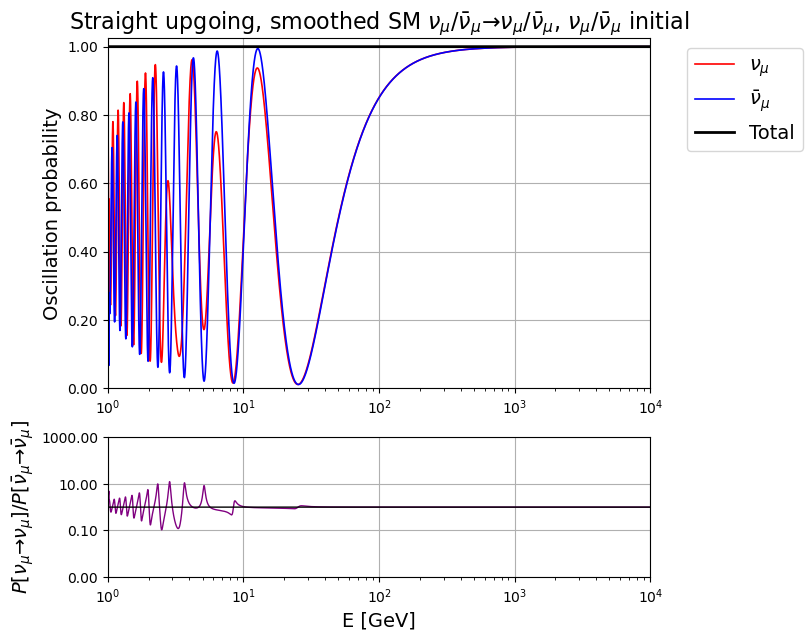

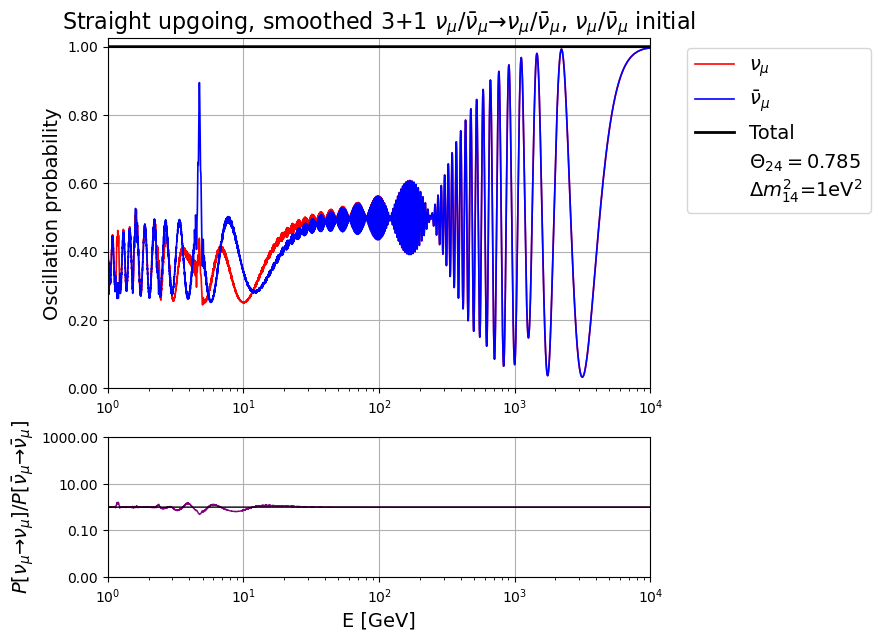

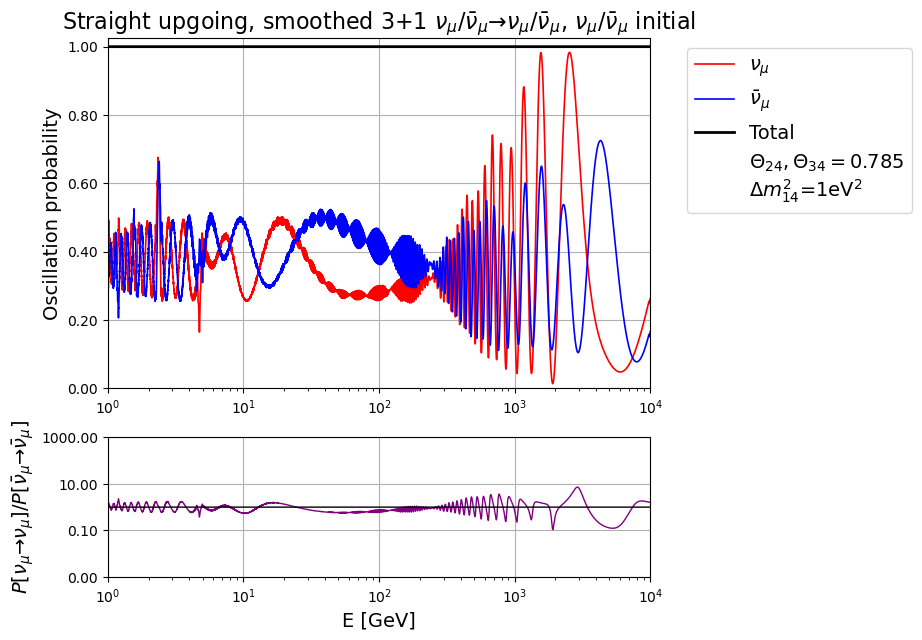

303.9323425292969 s


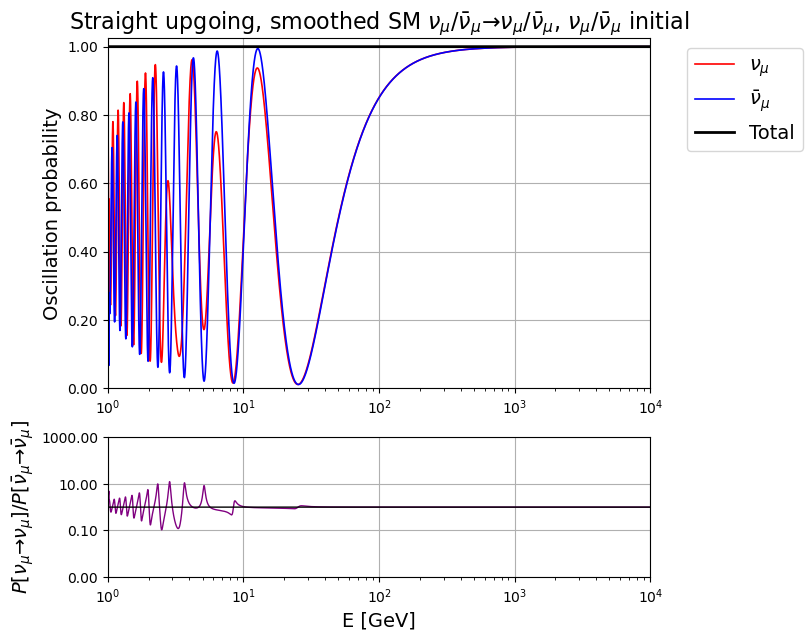

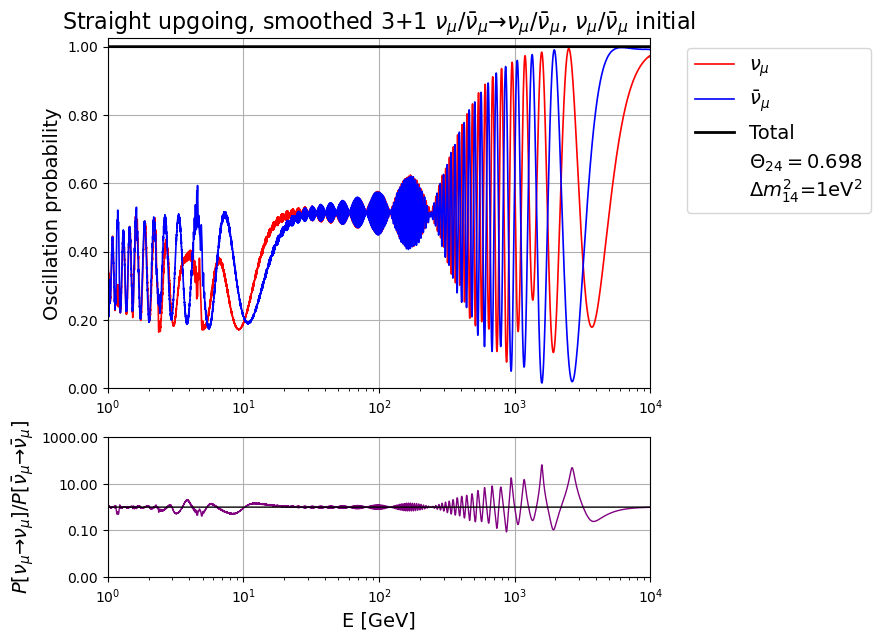

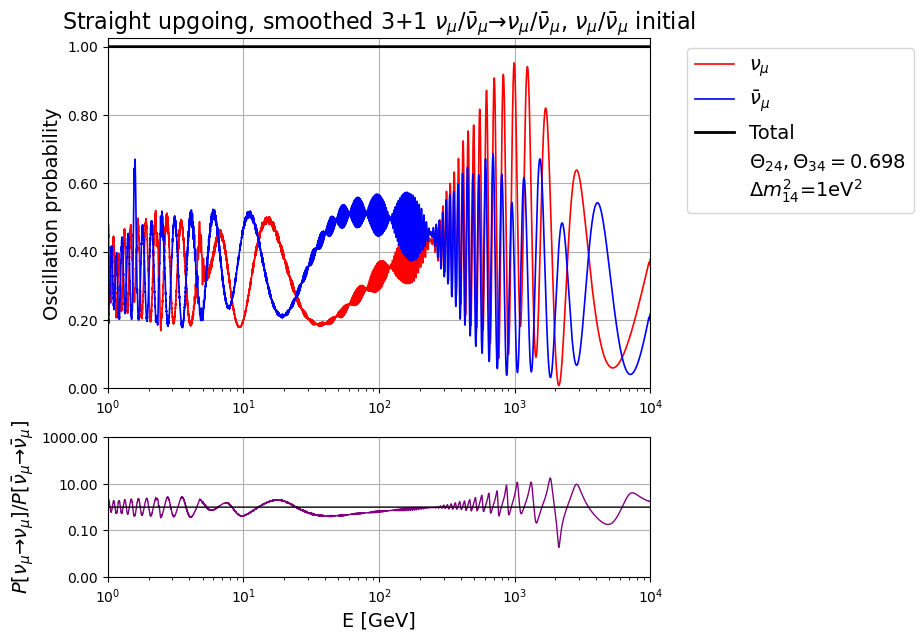

304.2032701969147 s


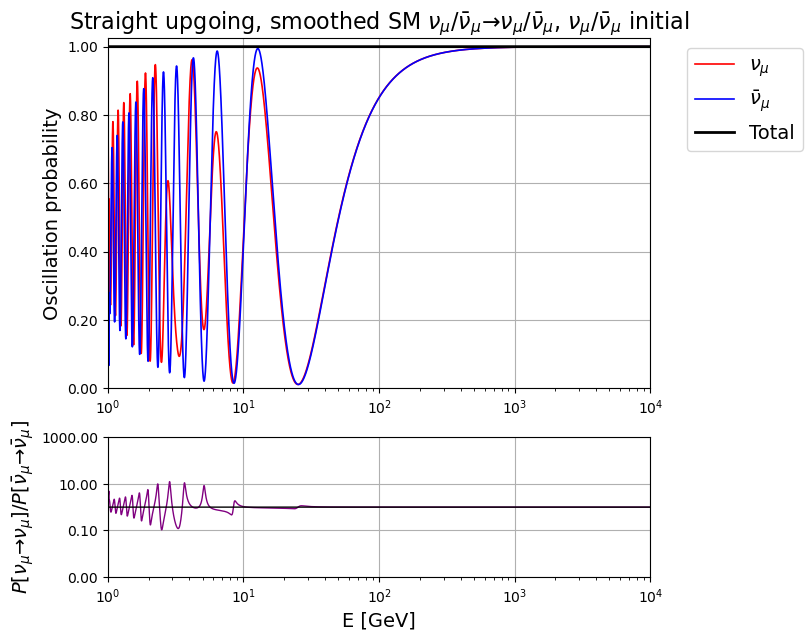

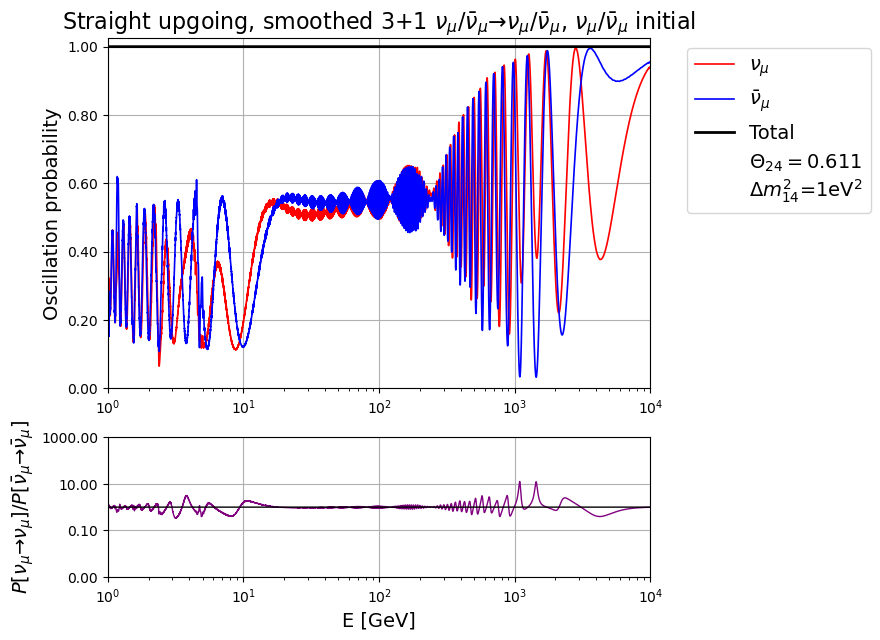

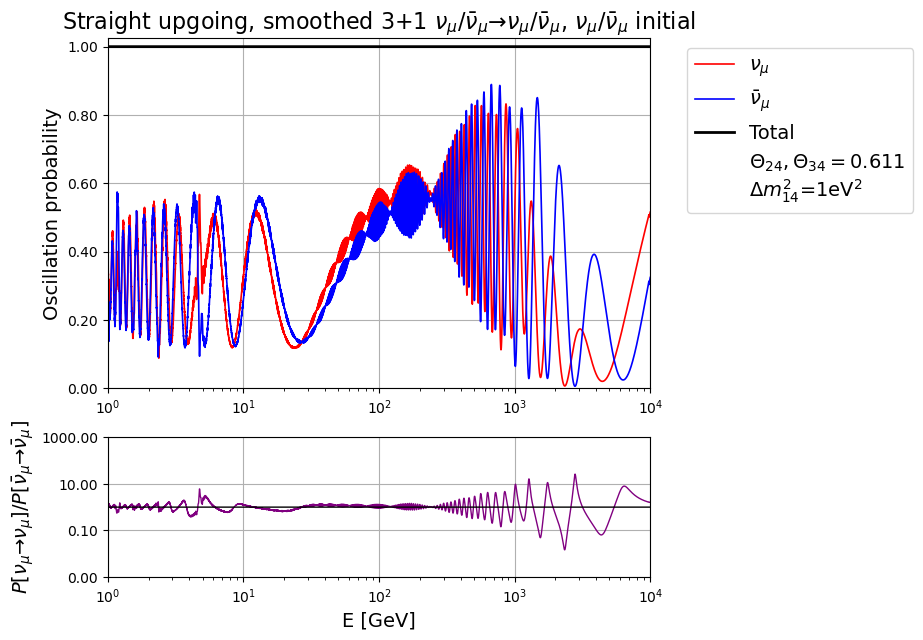

298.0603218078613 s


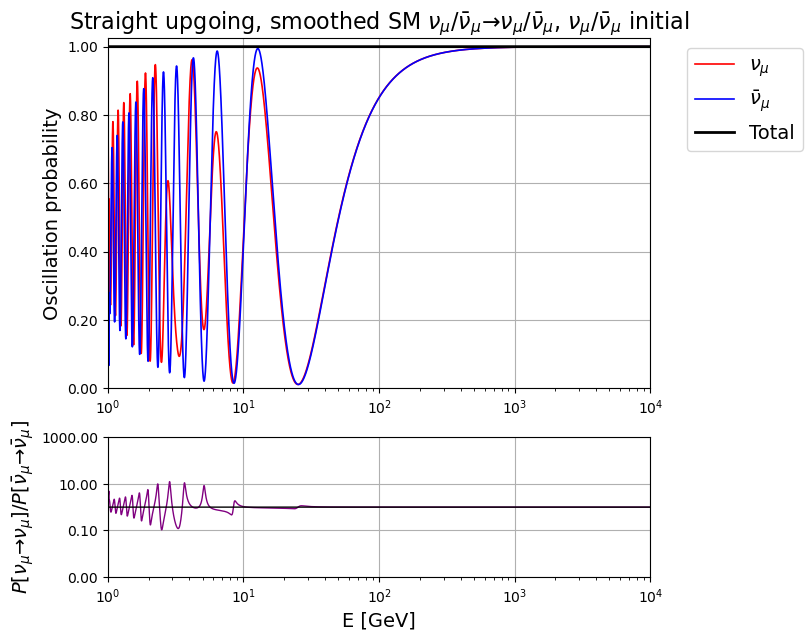

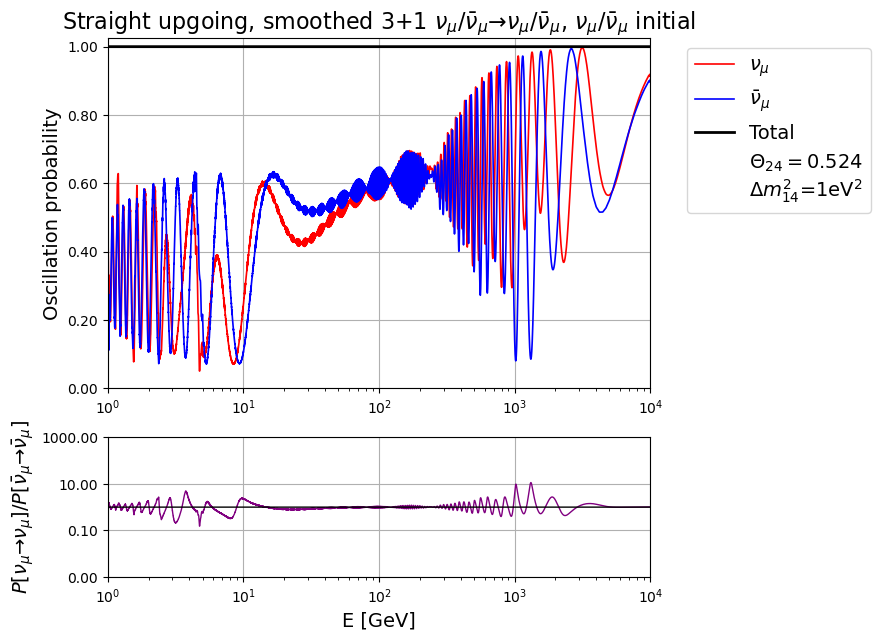

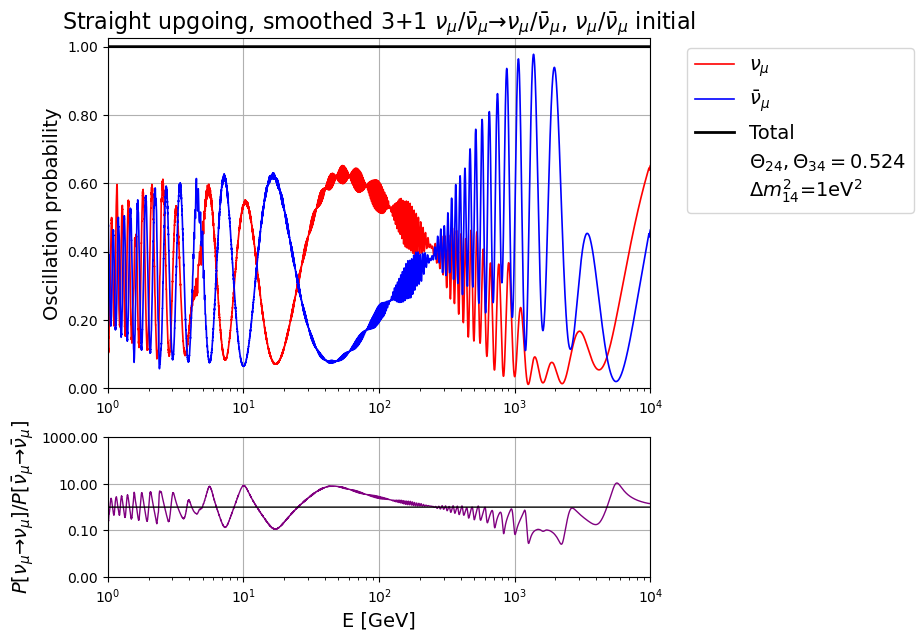

In [ ]:
if plotflag == True:

    for th in list(reversed(thrange)):
        #object creation
        nsq_atm3_single =nuSQUIDSTools.ExtNuSQUIDSAtm(cth_nodes,energy_nodes,3,nsq.NeutrinoType.both,interactions) #SM case
        nsq_atm4_single =nuSQUIDSTools.ExtNuSQUIDSAtm(cth_nodes,energy_nodes,4,nsq.NeutrinoType.both,interactions) #sterile case
        nsq_atm4_multi =nuSQUIDSTools.ExtNuSQUIDSAtm(cth_nodes,energy_nodes,4,nsq.NeutrinoType.both,interactions) #sterile case
        
        #mixing parameters
        nsq_atm3_single.Set_MixingParametersToDefault()
        nsq_atm4_single.Set_MixingParametersToDefault()
        MixParamsS=ChangeMixingParams(nsq_atm4_single) 
        MixParamsS.Mass(3,1.) 
        MixParamsS.Angle(1,3,th) 
        MixParamsM=ChangeMixingParams(nsq_atm4_multi) 
        MixParamsM.Mass(3,1.)
        MixParamsM.Angle(1,3,th) 
        MixParamsM.Angle(2,3,th) 
        
        #initial conditions
        IFlux3=SetIniFlux(nsq_atm3_single,1,"both",Numnus,Power) 
        IFlux4S=SetIniFlux(nsq_atm4_single,1,"both",Numnus,Power) 
        IFlux4M=SetIniFlux(nsq_atm4_multi,1,"both",Numnus,Power)    
        nsq_atm3_single.Set_initial_state(IFlux3,nsq.Basis.flavor)
        nsq_atm4_single.Set_initial_state(IFlux4S,nsq.Basis.flavor)
        nsq_atm4_multi.Set_initial_state(IFlux4M,nsq.Basis.flavor)
        
        #evolve states
        temp=t.time()
        nsq_atm3_single.Set_rel_error(1.0e-5) 
        nsq_atm3_single.Set_abs_error(1.0e-5)
        nsq_atm4_single.Set_rel_error(1.0e-5) 
        nsq_atm4_single.Set_abs_error(1.0e-5)
        nsq_atm4_multi.Set_rel_error(1.0e-5) 
        nsq_atm4_multi.Set_abs_error(1.0e-5)
        nsq_atm3_single.EvolveState()
        nsq_atm4_single.EvolveState()
        nsq_atm4_multi.EvolveState()
        print(t.time()-temp,"s") 
        
        #Get Fluxes
        Plots_single_0 = nuPlots(nsq_atm3_single) #SM fluxes
        Flux_single_0_0_mu = Plots_single_0.Get_Flux(trackangle,0,NewEs)
        Flux_single_0_1_mu = Plots_single_0.Get_Flux(trackangle,1,NewEs)
        Plots_single_1 = nuPlots(nsq_atm4_single) #sterile fluxes
        Flux_single_1_0_mu = Plots_single_1.Get_Flux(trackangle,0,NewEs)  
        Flux_single_1_1_mu = Plots_single_1.Get_Flux(trackangle,1,NewEs)  
        Plots_multi_1 = nuPlots(nsq_atm4_multi) #sterile fluxes
        Flux_multi_1_0_mu = Plots_multi_1.Get_Flux(trackangle,0,NewEs)  
        Flux_multi_1_1_mu = Plots_multi_1.Get_Flux(trackangle,1,NewEs)   
        
        phi_single_0_0_mu, total_single_0_0_mu = Flux_single_0_0_mu[1], Flux_single_0_0_mu[3] #mu sm
        phi_single_0_1_mu, total_single_0_1_mu = Flux_single_0_1_mu[1], Flux_single_0_1_mu[3] #antimu sm
        phi_single_1_0_mu, total_single_1_0_mu = Flux_single_1_0_mu[1], Flux_single_1_0_mu[4] #mu th24
        phi_single_1_1_mu, total_single_1_1_mu = Flux_single_1_1_mu[1], Flux_single_1_1_mu[4] #antimu th24
        phi_multi_1_0_mu, total_multi_1_0_mu = Flux_multi_1_0_mu[1], Flux_multi_1_0_mu[4] #mu th24 th34
        phi_multi_1_1_mu, total_multi_1_1_mu = Flux_multi_1_1_mu[1], Flux_multi_1_1_mu[4] #antimu th24 th34

        #SM
        fig0, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [2, 0.8]},figsize=(7,7))
        ax1.plot(NewEs/units.GeV,smooth(phi_single_0_0_mu,25)/smooth(total_single_0_0_mu,25),
                 label=r'$\nu_\mu$',color='red',lw=1.2)
        ax1.plot(NewEs/units.GeV,smooth(phi_single_0_1_mu,25)/smooth(total_single_0_1_mu,25),
                 label=r'$\bar{\nu}_\mu$',color='blue',lw=1.2)
        ax1.plot(NewEs/units.GeV,smooth(total_multi_1_0_mu,0)/smooth(total_multi_1_0_mu,0),
                 label='Total',color='black',lw=2.)
        ax1.set_xscale('log')
        ax1.set_xlim(NewEs[0]/units.GeV,NewEs[-1]/units.GeV)
        ax1.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
        ax1.set_ylim(0,1.025)
        ax1.set_ylabel('Oscillation probability', fontsize = 14)
        ax1.grid()
        ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize = 14, fancybox =True)
        ax1.set_title(r'Straight upgoing, smoothed SM $\nu_\mu / \bar{\nu}_\mu \to \nu_\mu / \bar{\nu}_\mu$, $\nu_\mu$/$\bar{\nu}_\mu$ initial', fontsize = 16)
        ax2.plot(NewEs/units.GeV,smooth(phi_single_0_0_mu,25)/smooth(phi_single_0_1_mu,25), 
                 lw = 1., ls='solid', color = "purple")
        ax2.plot(NewEs/units.GeV,np.ones(len(NewEs)), lw = 1., ls='solid', color = "black") 
        ax2.set_xscale('log')
        ax2.set_yscale('log')
        ax2.set_ylim(1e-3,1e3)
        ax2.set_xlim(NewEs[0]/units.GeV,NewEs[-1]/units.GeV)
        ax2.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
        ax2.set_ylabel(r"$P[\nu_\mu \to \nu_\mu]/P[\bar{\nu}_\mu \to \bar{\nu}_\mu]$",fontsize = 14)
        ax2.set_xlabel(r"E [GeV]",fontsize = 14)
        ax2.grid()
        plt.savefig('Osc_Param_Test_Plots/Smoothing/Improved/SM_smoothed_osc_ratio_mu.png'.format(test=round(th,3)),bbox_inches ='tight')
        plt.show()
        plt.close()
        
        exlabel1 = r'$\Theta_{{24}}={test}$'.format(test=round(th,3))+'\n'+r'$\Delta m_{14}^2$=1eV$^2$'
        exlabel2 = r'$\Theta_{{24}},\Theta_{{34}}={test}$'.format(test=round(th,3))+'\n'+r'$\Delta m_{14}^2$=1eV$^2$'
        
        #th24
        fig1, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [2, 0.8]},figsize=(7,7))
        ax1.plot(NewEs/units.GeV,smooth(phi_single_1_0_mu,25)/smooth(total_single_1_0_mu,25),
                 label=r'$\nu_\mu$',color='red',lw=1.2)
        ax1.plot(NewEs/units.GeV,smooth(phi_single_1_1_mu,25)/smooth(total_single_1_1_mu,25),
                 label=r'$\bar{{\nu}}_\mu$',color='blue',lw=1.2)
        ax1.plot(NewEs/units.GeV,smooth(total_single_1_0_mu,0)/smooth(total_single_1_0_mu,0),
                 label='Total',color='black',lw=2.)
        ax1.plot([],'',label=exlabel1,color='white')
        ax1.set_xscale('log')
        ax1.set_xlim(NewEs[0]/units.GeV,NewEs[-1]/units.GeV)
        ax1.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
        ax1.set_ylim(0,1.025)
        ax1.set_ylabel('Oscillation probability', fontsize = 14)
        ax1.grid()
        ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize = 14, fancybox =True)
        ax1.set_title(r'Straight upgoing, smoothed 3+1 $\nu_\mu / \bar{\nu}_\mu \to \nu_\mu / \bar{\nu}_\mu$, $\nu_\mu$/$\bar{\nu}_\mu$ initial', 
                      fontsize = 16)
        ax2.plot(NewEs/units.GeV,smooth(phi_single_1_0_mu,25)/smooth(phi_single_1_1_mu,25), 
                 lw = 1., ls='solid', color = "purple")
        ax2.plot(NewEs/units.GeV,np.ones(len(NewEs)), lw = 1., ls='solid', color = "black") 
        ax2.set_xscale('log')
        ax2.set_yscale('log')
        ax2.set_ylim(1e-3,1e3)
        ax2.set_xlim(NewEs[0]/units.GeV,NewEs[-1]/units.GeV)
        ax2.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
        ax2.set_ylabel(r"$P[\nu_\mu \to \nu_\mu]/P[\bar{\nu}_\mu \to \bar{\nu}_\mu]$",fontsize = 14)
        ax2.set_xlabel(r"E [GeV]",fontsize = 14)
        ax2.grid()
        plt.savefig('Osc_Param_Test_Plots/Smoothing/Improved/{test}_th24_smoothed_osc_ratio_mu.png'.format(test=round(th,3)),bbox_inches ='tight')
        plt.show()
        plt.close()
        
        #th34
        fig2, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [2, 0.8]},figsize=(7,7))
        ax1.plot(NewEs/units.GeV,smooth(phi_multi_1_0_mu,25)/smooth(total_multi_1_0_mu,25),
                 label=r'$\nu_\mu$',color='red',lw=1.2)
        ax1.plot(NewEs/units.GeV,smooth(phi_multi_1_1_mu,25)/smooth(total_multi_1_1_mu,25),
                 label=r'$\bar{{\nu}}_\mu$',color='blue',lw=1.2)
        ax1.plot(NewEs/units.GeV,smooth(total_multi_1_0_mu,0)/smooth(total_multi_1_0_mu,0),
                 label='Total',color='black',lw=2.)
        ax1.plot([],'',label=exlabel2,color='white')
        ax1.set_xscale('log')
        ax1.set_xlim(NewEs[0]/units.GeV,NewEs[-1]/units.GeV)
        ax1.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
        ax1.set_ylim(0,1.025)
        ax1.set_ylabel('Oscillation probability', fontsize = 14)
        ax1.grid()
        ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize = 14, fancybox =True)
        ax1.set_title(r'Straight upgoing, smoothed 3+1 $\nu_\mu / \bar{\nu}_\mu \to \nu_\mu / \bar{\nu}_\mu$, $\nu_\mu$/$\bar{\nu}_\mu$ initial', 
                      fontsize = 16)
        ax2.plot(NewEs/units.GeV,smooth(phi_multi_1_0_mu,25)/smooth(phi_multi_1_1_mu,25), 
                 lw = 1., ls='solid', color = "purple")
        ax2.plot(NewEs/units.GeV,np.ones(len(NewEs)), lw = 1., ls='solid', color = "black") 
        ax2.set_xscale('log')
        ax2.set_yscale('log')
        ax2.set_ylim(1e-3,1e3)
        ax2.set_xlim(NewEs[0]/units.GeV,NewEs[-1]/units.GeV)
        ax2.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
        ax2.set_ylabel(r"$P[\nu_\mu \to \nu_\mu]/P[\bar{\nu}_\mu \to \bar{\nu}_\mu]$",fontsize = 14)
        ax2.set_xlabel(r"E [GeV]",fontsize = 14)
        ax2.grid()
        plt.savefig('Osc_Param_Test_Plots/Smoothing/Improved/{test}_th2434_smoothed_osc_ratio_mu.png'.format(test=round(th,3)),bbox_inches ='tight')
        plt.show()
        plt.close()